# EDA + Visualization of Ford GoBike Dataset

## Introduction

Ford GoBike System Dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the month of February, 2019.  
  
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the year 2019. The data set has been stored as a csv file, it has 16 features and 183412 entries. The features are:

- duration_sec - Ridden time in sec
- start_time - Ride start time
- end_time - Ride end time
- start_station_id - Ride start station id
- start_station_name - Ride start station name
- start_station_latitude - Ride start station location in latitude
- start_station_longitude - Ride start station location in longitude
- end_station_id - Ride end station id
- end_station_name - Ride end station name
- end_station_latitude - Ride end station location in latitude
- end_station_longitude - Ride end station location in longitude
- bike_id - Ride bike id
- user_type - User type either Subscriber or Customer
- member_birth_year - Member birth year
- member_gender - Member gender
- bike_share_for_all_trip - is the bike used for round trips?

## Preliminary Wrangling

### Importing Necessary Packages

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Changing a global figure settings 

In [2]:
# default sns theme
sns.set_style('darkgrid')

### Loading the Dataset

In [3]:
gobike_df = pd.read_csv("201902-fordgobike-tripdata.csv")

# Dataset head
gobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Assessing the Dataset

> In this section, I will go through assessing the dataset looking for both quality and tidiness issues. Todo so, I use programmatic assessment.

In [4]:
# dataset information
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Issues Found

- Incorrect Data type for `start_time`, `end_time`, `station_start_id`, `end_station_id`, `member_birth_year` features
- Missing values for `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year`,  and `member_gender`
- Unnecessary features `start_station_id`, `end_station_id`, `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, and `end_station_longitude`

In [5]:
gobike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Further Checkup

- min `duration_sec` value

In [6]:
gobike_df[gobike_df.duration_sec == 61]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
18578,61,2019-02-26 18:23:44.2830,2019-02-26 18:24:45.5230,368.0,Myrtle St at Polk St,37.785434,-122.419622,368.0,Myrtle St at Polk St,37.785434,-122.419622,5333,Subscriber,1989.0,Female,No
19581,61,2019-02-26 16:40:53.1210,2019-02-26 16:41:54.4510,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5306,Subscriber,1987.0,Female,No
27017,61,2019-02-25 10:31:18.4150,2019-02-25 10:32:19.7480,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5921,Subscriber,1972.0,Male,Yes
44301,61,2019-02-22 15:09:57.0480,2019-02-22 15:10:58.7420,310.0,San Fernando St at 4th St,37.335885,-121.885660,280.0,San Fernando St at 7th St,37.337122,-121.883215,6347,Subscriber,1989.0,Male,Yes
44787,61,2019-02-22 13:56:21.9760,2019-02-22 13:57:23.4650,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,81.0,Berry St at 4th St,37.775880,-122.393170,6150,Subscriber,1931.0,Male,No
51120,61,2019-02-21 18:27:34.9930,2019-02-21 18:28:36.6300,113.0,Franklin Square,37.764555,-122.410345,100.0,Bryant St at 15th St,37.767100,-122.410662,6515,Subscriber,1984.0,Male,No
58992,61,2019-02-20 21:44:00.1540,2019-02-20 21:45:01.2350,85.0,Church St at Duboce Ave,37.770083,-122.429156,85.0,Church St at Duboce Ave,37.770083,-122.429156,4351,Subscriber,1994.0,Male,No
64088,61,2019-02-20 13:08:18.2850,2019-02-20 13:09:19.4330,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,80.0,Townsend St at 5th St,37.775235,-122.397437,2090,Subscriber,1931.0,Male,No
80047,61,2019-02-18 16:31:12.8960,2019-02-18 16:32:14.5880,89.0,Division St at Potrero Ave,37.769218,-122.407646,101.0,15th St at Potrero Ave,37.767079,-122.407359,6195,Subscriber,1931.0,Male,No
82564,61,2019-02-18 09:53:31.3990,2019-02-18 09:54:33.1620,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,3054,Subscriber,1990.0,Male,No


No issues found

#### Further Checkup

- Is `member_birth_year` and `member_gender` only for Subscribers?

In [7]:
# Check if the birth year is only for subscribers
gobike_df[gobike_df.user_type == 'Customer'].member_birth_year.value_counts()

member_birth_year
1989.0    1074
1988.0     943
1990.0     885
1991.0     828
1987.0     815
          ... 
1947.0       2
1878.0       1
1944.0       1
1928.0       1
1930.0       1
Name: count, Length: 62, dtype: int64

The above code clearly shows the `member_birth_year` are actually missing

In [8]:
# Check if the gender is only for subscribers
gobike_df[gobike_df.user_type == 'Customer'].member_gender.value_counts()

member_gender
Male      11529
Female     4647
Other       455
Name: count, dtype: int64

The above code clearly shows the `member_gender` are actually missing

In [9]:
# Checking for duplicates
gobike_df.duplicated().sum()

0

### Cleaning

In this section, I will go through the cleaning process for the issues found above in the above `Analysis` section.

#### Dropping unnecessary features

In [10]:
gobike_df.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], inplace=True)

In [11]:
# Checking if the dropping worked
gobike_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

Before I drop the `start_station_id` and `end_station_id`, let me first fix the missing Ids issue.

#### Fixing Missing Ids

In [12]:
# Filtering the stations those don't have ids but names
gobike_df[(gobike_df.start_station_id.isna() & gobike_df.start_station_name.notna())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


Since both the start station id and name are missing, there is no way I can recover the ids. So, I will drop them.

In [13]:
# Dropping with empty values for start station id
gobike_df.drop(index=gobike_df[gobike_df.start_station_id.isna()].index, inplace=True)

In [14]:
# Checking if dropping the entries with empty start station id
# dropped the entries with empty values for end station id
gobike_df[gobike_df.end_station_id.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


Since there aren't any entries with empty values for end station id, nothing will be dropped.

Now it's the time to drop the `start_station_id` and `end_station_id`. But let me first check their value is aligned with `start_station_name` and `end_station_name` respectively.

In [15]:
gobike_df.start_station_id.nunique(), gobike_df.start_station_name.nunique()

(329, 329)

In [16]:
gobike_df.end_station_id.nunique(), gobike_df.end_station_name.nunique()

(329, 329)

Since the values aligned to each other, I can drop the `station_ids` without any worry

In [17]:
gobike_df.drop(columns=['start_station_id', 'end_station_id'], inplace=True)

# checking if dropping worked
gobike_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

#### Fixing Missing Birth Years

In [18]:
# Filtering the entries with no Birth Year
gobike_df[gobike_df.member_birth_year.isna()].head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,Channing Way at Shattuck Ave,Shattuck Ave at Hearst Ave,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,University Ave at Oxford St,Channing Way at San Pablo Ave,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,Davis St at Jackson St,Davis St at Jackson St,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,Commercial St at Montgomery St,Berry St at 4th St,2951,Subscriber,NaN,NaN,No


It looks like the entries with missing values for `member_birth_year` feature also have a missing value for `member_gender`. Let me check if that is true.

In [19]:
gobike_df[gobike_df.member_birth_year.isna() & gobike_df.member_gender.notna()]

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


Since the above justification is true, I will drop the entries.

In [20]:
gobike_df.drop(index=gobike_df[gobike_df.member_birth_year.isna()].index, inplace=True)

In [21]:
# Checking if the dropping worked
gobike_df[['member_birth_year', 'member_gender']].isna().sum()

member_birth_year    0
member_gender        0
dtype: int64

#### Fixing Data Types

In [22]:
# change string data types to datetime
gobike_df.start_time = pd.to_datetime(gobike_df.start_time, format="%Y-%m-%d %H:%M:%S.%f")
gobike_df.end_time = pd.to_datetime(gobike_df.end_time, format="%Y-%m-%d %H:%M:%S.%f")

# Testing the conversion
gobike_df[['start_time', 'end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

In [23]:
# Changing the float types to int
gobike_df[['member_birth_year']] = gobike_df[['member_birth_year']].astype(int)

In [24]:
# checking if type conversion works
gobike_df.member_birth_year.dtype

dtype('int32')

After assessing and cleaning the dataset

### The Structure of Dataset:

In [25]:
gobike_df.shape

(174952, 10)

I have left with, 174952 entries with 10 features ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip').  
  
Most of the features are composed of datetime, string, and integer, but the features `user_type`, `member_gender`, and `bike_share_for_all_trip` contain nominal values in the following format:
- `user_type` => 'Subscriber' or `Customer'
- `member_gender` => 'Male', 'Female', or 'Other'
- `bike_share_for_all_trip` => 'Yes' or 'No'

### The main features of my Interest are:

I'm most interested in figuring out what age group and user type has higher riding minutes. I am also interested on finding out what time in a day and what date in a week has highest number of trips.  
  
I won't be limited on answering the above questions, I will list the questions I would like to answer under the Questions section below.

### What features in the dataset support my investigation?

I expect that `duration_sec` will have the strongest effect on finding the longest trip for both age group and user type. The `start_time` and `end_time` features will play a huge role on finding the highest number of trips per hour and day.

### Data Analysis and Feature Engineering

### Univariate Data Exploration

1. Bike Distribution
1. Gender Distribution
1. User Type Distribution
1. Age Distribution
1. Ride Duration Distribution in Minutes
1. Ride Distribution Hourly in a Day
1. Ride Distribution Daily in a Week
1. Bike share users on all trip Distribution
1. Start and End station distributions

### Bivariate Data Exploration

1. Relationship between Gender and Ride Duration
1. Relationship between Gender and Ride Time
    - What time is the number of riders will be high for each group?
1. Relationship between Gender and User Type
1. Relationship between Gender and Age
1. Relationship between User Type and Ride Duration
1. Relationship between User Type and Ride Time Hourly
1. Relationship between User Type and Age
1. Relationship between Ride Time Hourly and Duration
1. Relationship between Age and Ride Duration

### Multivariate Data Exploration

1. Correlation between Gender, Age, and User Type Distribution
1. Correlation between User Type, Gender, and Hour in a Day
1. Correlation between User Type, Gender, and Day in a Week
1. Correlation between User Type, Day in a Week, and Hour in a Day

## Feature Engineering

Before I start answering the questions, let me add a column of `age` by calculating the difference between `member_birth_year` and `2019` (Data Set collected year)

In [26]:
# creating Age Column
gobike_df['age'] = gobike_df.member_birth_year.apply(lambda x: 2019 - x)

# Check
gobike_df.age.head()

0    35
2    47
3    30
4    45
5    60
Name: age, dtype: int64

Now we know age calculation works perfectly, let me add one more categorical feature to categorize age groups

In [27]:
gobike_df.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

Since the min is 18 and the max is 141, let me categorize the age in groups of 10s, 20s, 30s, and so forth but I will put all the ages more than 100 in a category of 100s

In [28]:
# defining the range for the age group
bins = list(range(10, 110, 10))
# append the max item to bins
bins.append(gobike_df.age.max())

# defining group labels
labels = [f"{str(group)}s" for group in bins[:-1]]

# Check the bins and labels
bins, labels

([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 141],
 ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s'])

The category bins and labels are ready, I can cut the age groups as follows

In [29]:
# categorizing the ages between 10 - 90
gobike_df["age_group"] = pd.cut(gobike_df.age, bins=bins, labels=labels)

# check the age group
gobike_df.age_group.value_counts()

age_group
20s     70054
30s     63808
40s     22024
50s     11323
10s      4213
60s      2955
70s       383
80s       115
100s       72
90s         5
Name: count, dtype: int64

I have engineered the necessary features for my analysis, so I wil drop the `member_birth_year` since I don't need it anymore.

In [30]:
# dropping the `member_birth_year` feature
gobike_df.drop(columns='member_birth_year', inplace=True)

# check if the dropping worked
gobike_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'age', 'age_group'],
      dtype='object')

Creating a ride duration in Minuet rounding values to the nearest higher integer and drop the duration in second

In [31]:
# Divide the seconds for 60 and rounding the values
gobike_df["duration_min"] = np.ceil(gobike_df.duration_sec / 60).astype(int)

# dropping the duration in sec
gobike_df.drop(columns='duration_sec', inplace=True)

# check if the conversion works
gobike_df.duration_min.describe()

count    174952.000000
mean         12.225210
std          27.371465
min           2.000000
25%           6.000000
50%           9.000000
75%          14.000000
max        1410.000000
Name: duration_min, dtype: float64

## Analyzing the Dataset

In this section I will use Question-Visualization-Observations framework repeatedly to explore the features in the dataset.  
  
To make the visualization code easier, let me define a helper function that will setup the basics for the graph like figure size, labels, and titles.

In [32]:
# base color to make all graph similar
base_color = sns.color_palette()[0]


def figure_basics(title: str, xlabel: str="", ylabel: str="", x_double: bool=False, y_double: bool=False):
    """A function to setup shared setting between graphs

    Args:
        title (str): Graph title
        xlabel (str, optional): Text for x label. Defaults to "".
        ylabel (str, optional): Text for y label. Defaults to "".
        x_double (bool, optional): A boolean value to make the graph double in size in x axis. Defaults to False.
        y_double (bool, optional): A boolean value to make the graph double in size in y axis. Defaults to False.
    """
    plt.figure(figsize=(24 if x_double else 12, 16 if y_double else 8))
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

### Univariate Exploration

I am going to start by exploring the univariate features first and I will move on to the bi and multivariate features in the later sections.

#### Bike Distribution

Here I will try to find out how often the bicycles get driven

In [33]:
# Getting counts of each bike
bike_ride_count = gobike_df.bike_id.value_counts()

# Getting a summary of the statistics
bike_ride_count.describe()

count    4607.000000
mean       37.975255
std        36.376228
min         1.000000
25%        12.000000
50%        25.000000
75%        53.000000
max       179.000000
Name: count, dtype: float64

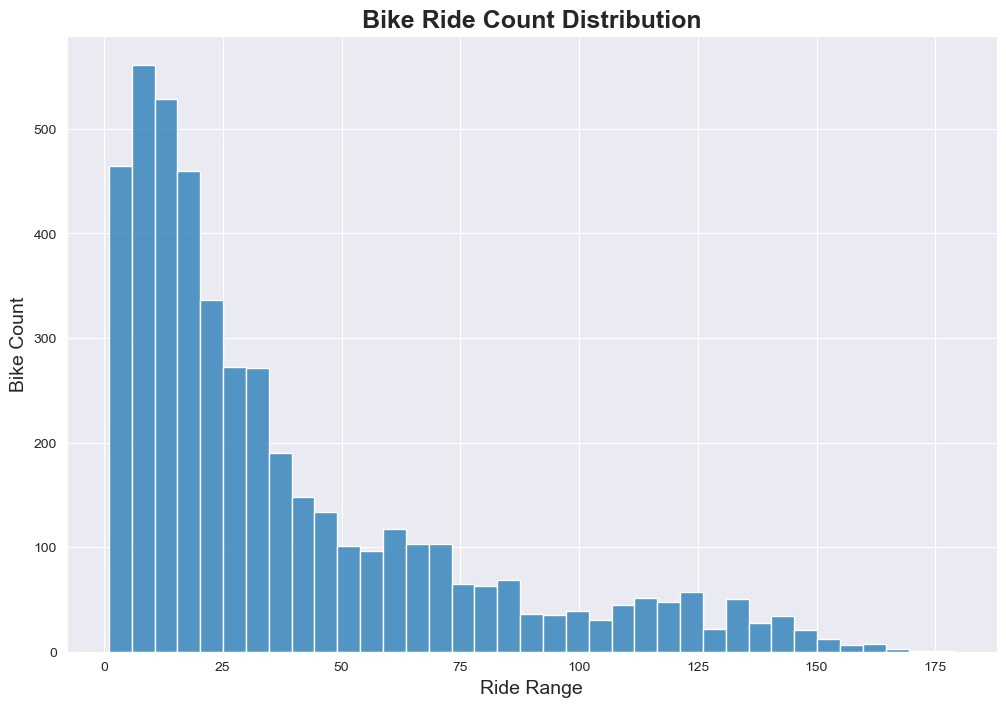

In [34]:
figure_basics("Bike Ride Count Distribution", "Ride Range", "Bike Count")
sns.histplot(data=bike_ride_count);

From the above graph, it is clear that most bikes are driven not more than 50 but there are also bikes driven more than 150 times.  
  
Let me find out the list of bike ids those are driven more than 150 time and plot their count in a line bar

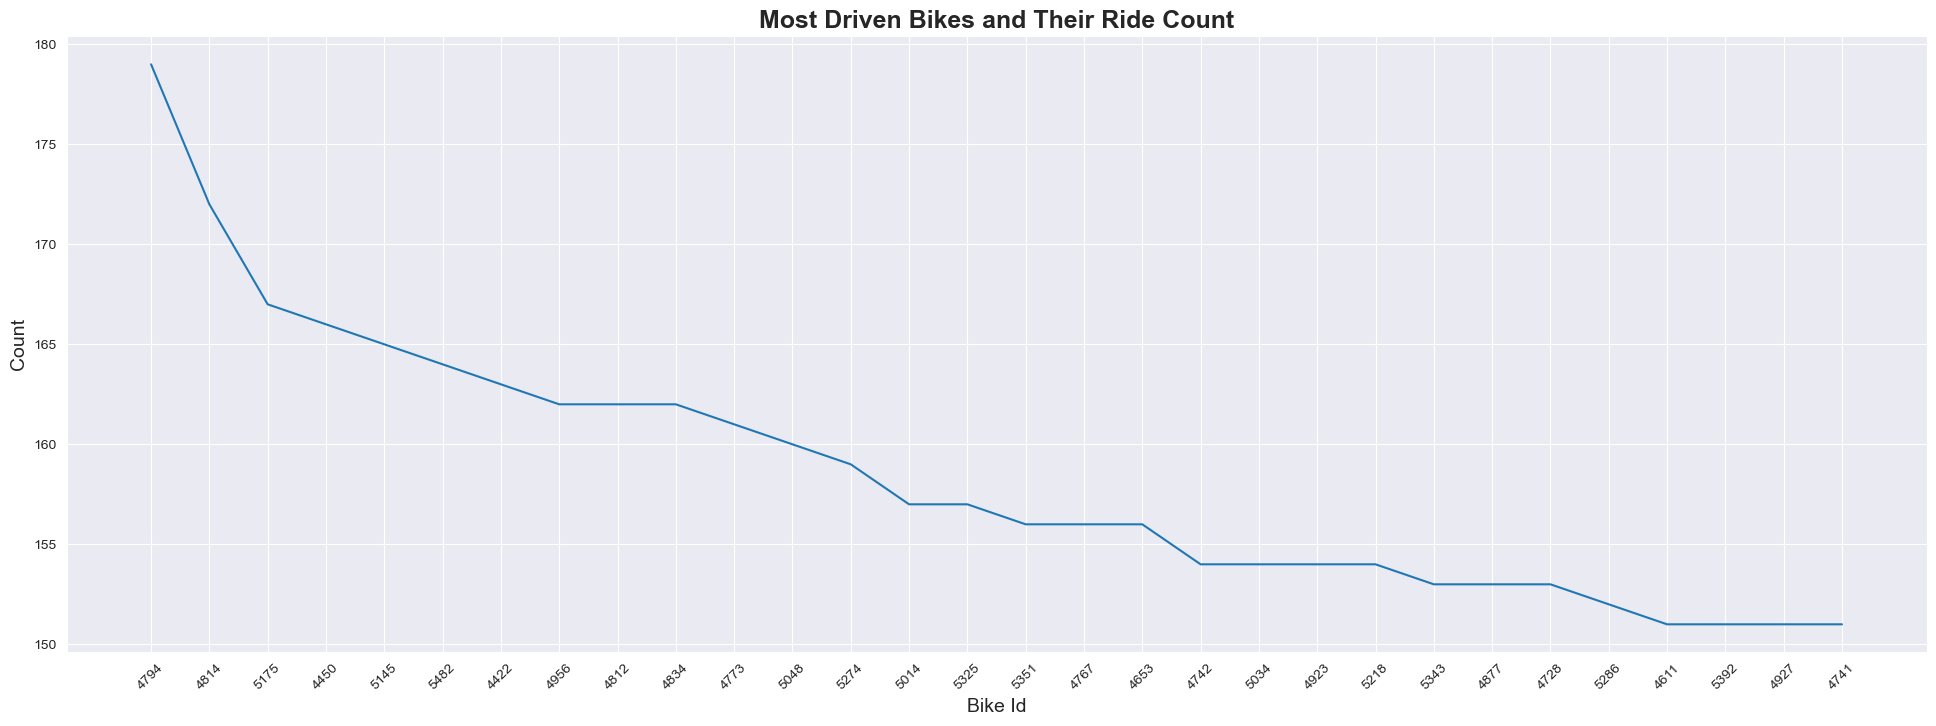

In [35]:
# filtering most driven bikes
most_driven_bikes = bike_ride_count[bike_ride_count > 150]

# renaming the columns
most_driven_bikes = most_driven_bikes.rename_axis("bike_id").reset_index(name="counts")
most_driven_bikes.bike_id = most_driven_bikes.bike_id.astype(str)

# Plotting in a graph
figure_basics("Most Driven Bikes and Their Ride Count", xlabel="Bike Id", ylabel="Count", x_double=True)
sns.lineplot(data=most_driven_bikes, x="bike_id", y="counts", color=base_color)
plt.xticks(rotation=45, horizontalalignment="center");

From all the bikes, a bike with id number `4794` is driven the most by a score of around 180.

#### Gender Distribution


Let me take a look at the distribution of riders gender

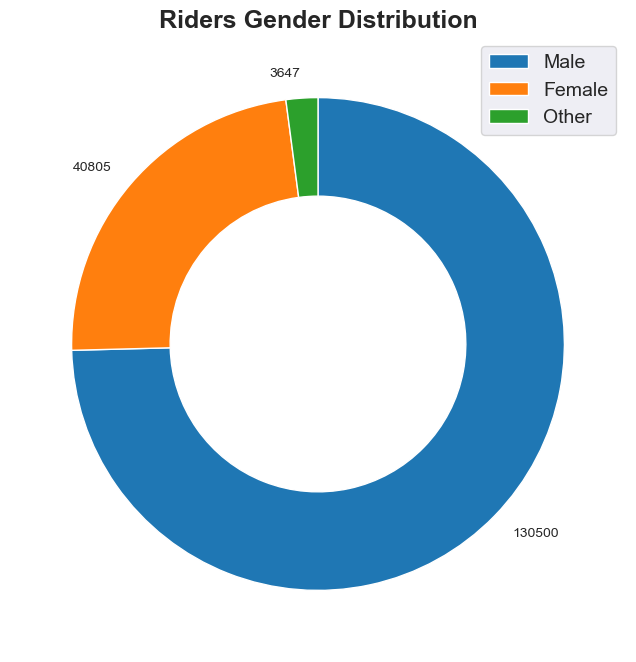

In [36]:
# getting the count of gender values
gender_counts = gobike_df['member_gender'].value_counts()

# Plotting the graph
figure_basics("Riders Gender Distribution")
plt.pie(gender_counts, labels=gender_counts.values, 
    startangle=90,
    counterclock=False, wedgeprops = {'width' : 0.4});
plt.legend(gender_counts.index, fontsize=14);

Males are the ones who rides bikes most often with almost triple size of Females

#### User Type Distribution


Let me check whether most of the drivers are subscribers or not.

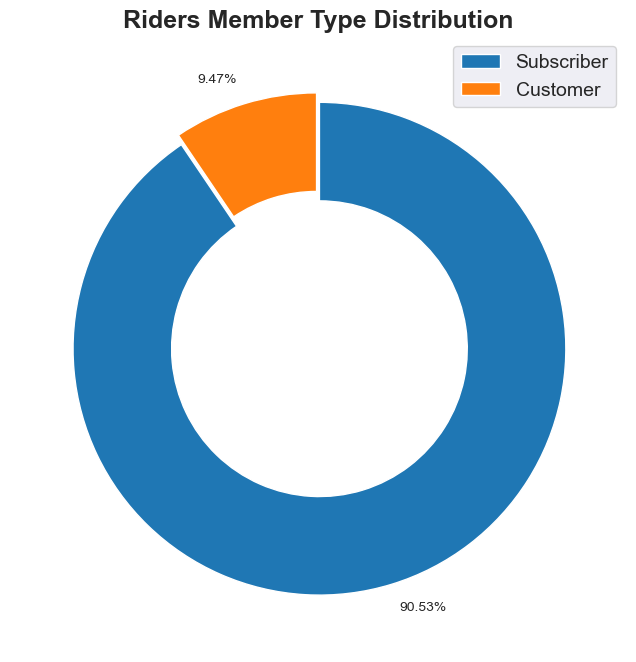

In [37]:
# getting the count of member values
member_counts = np.round(gobike_df['user_type'].value_counts(normalize=True) * 100, 2)

# Plotting the graph
figure_basics("Riders Member Type Distribution")
plt.pie(member_counts, labels=[f"{str(x)}%" for x in member_counts.values],
        startangle=90, explode=np.repeat(0.02, len(member_counts.index)),
        counterclock=False, wedgeprops = {'width' : 0.4});
plt.legend(member_counts.index, fontsize=14);

More than 90% of the riders are subscribers

#### Age Distribution


Let me checkout the age distribution of riders. I first check the histogram distribution of the `age` column and then I will use the `age_group` column.

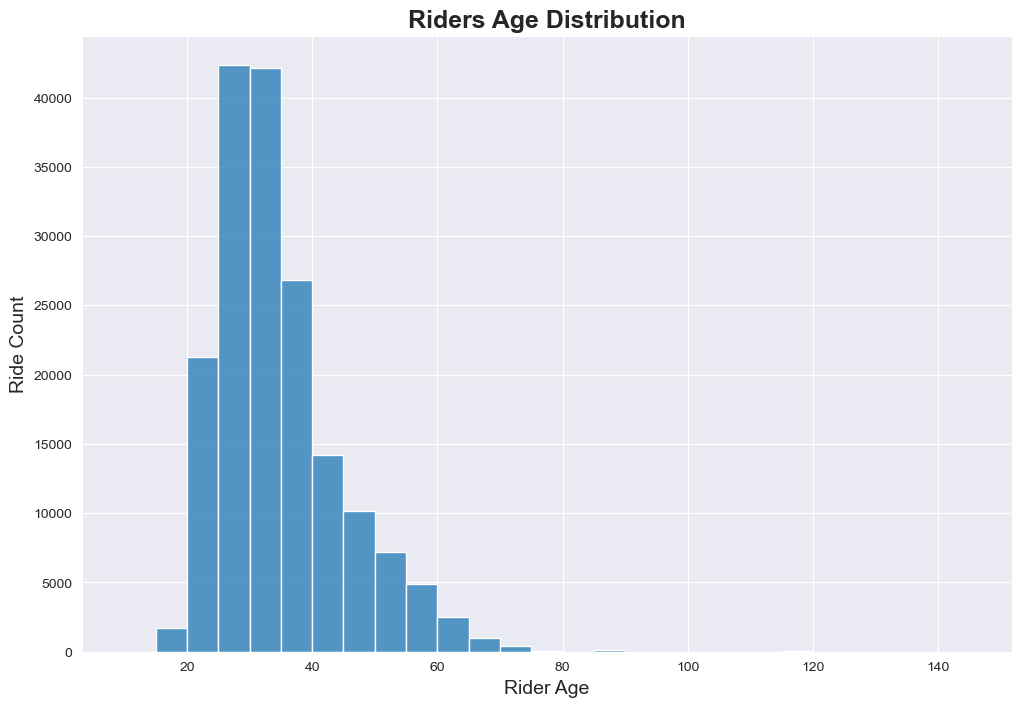

In [38]:
figure_basics("Riders Age Distribution", "Rider Age", "Ride Count")
sns.histplot(data=gobike_df.age, bins=range(10, gobike_df.age.max() + 5, 5));

Most of the riders are between age 25 and 35, but it's clear that there are a lot of outliers in the `age` feature. Since my goal isn't to clean the outliers, let me use the `age_group` and see what the distribution looks like. (Remember I grouped all rider whose ages greater than 100 in one group called `100s`)

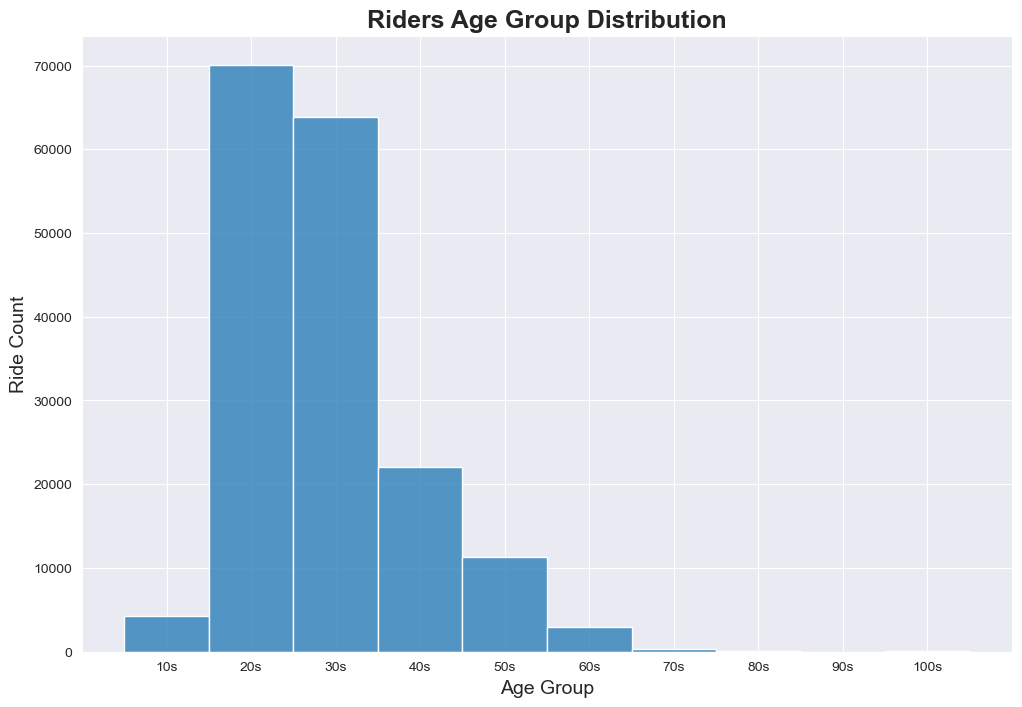

In [39]:
figure_basics("Riders Age Group Distribution", "Age Group", "Ride Count")
sns.histplot(data=gobike_df.age_group);

Even though it's clear now most of the riders are in `20s`, the riders more than `70s` are too few.

#### Ride Duration Distribution in Minuets

Let me first check the histogram distribution of the ride duration and answer which ride is the longest and shortest.

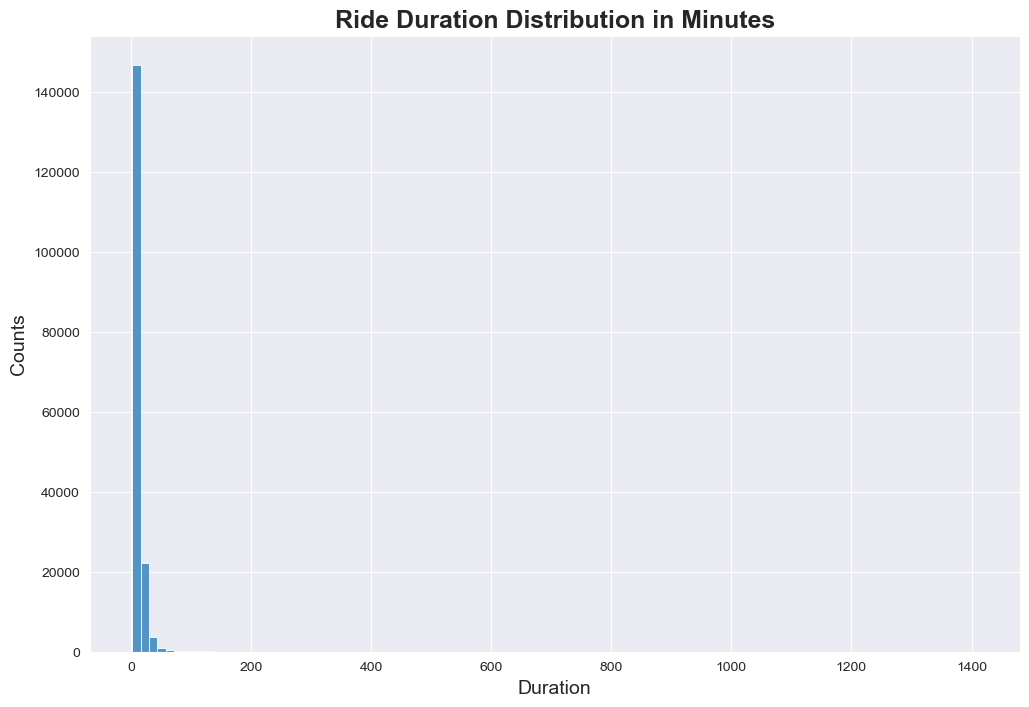

In [40]:
figure_basics("Ride Duration Distribution in Minutes", "Duration", "Counts")
sns.histplot(data=gobike_df.duration_min, bins=100);

It looks like most of the rides took around 100 mins, let me use the limit feature of matplotlibe graph to check the distribution of rides between 0 - 100 mins.

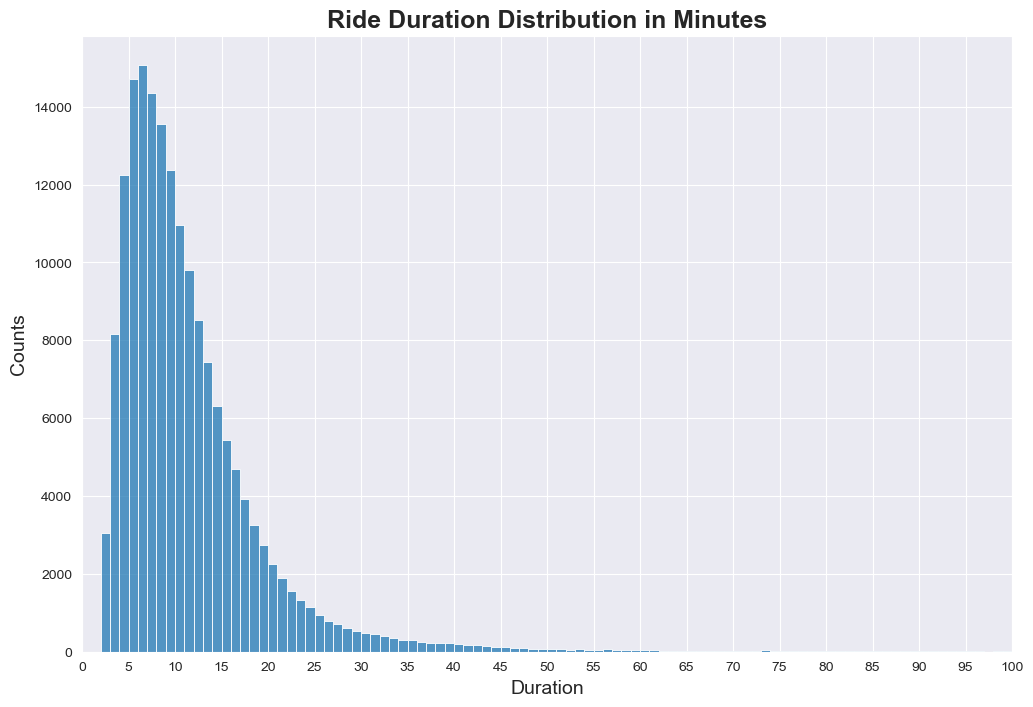

In [41]:
figure_basics("Ride Duration Distribution in Minutes", "Duration", "Counts")
sns.histplot(data=gobike_df.duration_min, bins=range(101))
plt.xlim((0, 100))
plt.xticks(ticks=range(0, 105, 5));

As it is clear from the above graph, most of the rides last between 2 and 20 mins. 7 mins is the highest duration.

#### Ride Distribution Hourly in a Day


I will check the hourly usage of bikes. Since most of the rides last for 13 mins, I will use the `start_time` feature to see the distribution of hourly usage in a day.

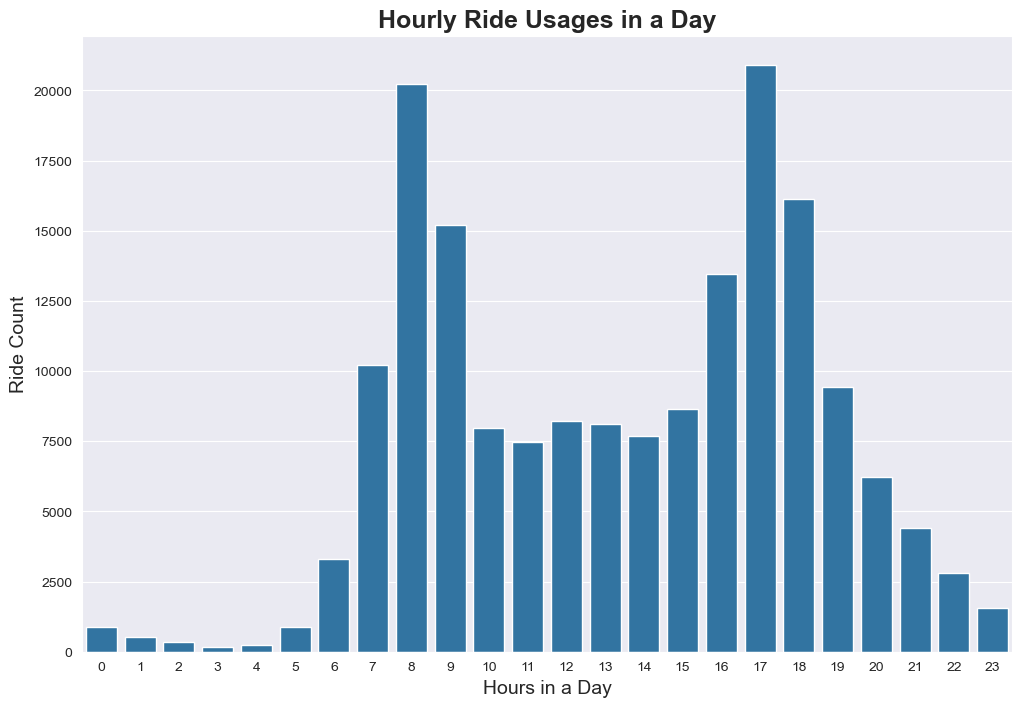

In [42]:
# calculating the hourly rides
hourly_count = gobike_df.groupby(gobike_df.start_time.dt.hour).duration_min.count()
hourly_count = hourly_count.rename_axis('hour').reset_index(name='count')

# drawing the graph
figure_basics("Hourly Ride Usages in a Day")
plot = sns.barplot(data=hourly_count, x='hour', y='count', color=base_color)
plot.set_xlabel("Hours in a Day", fontsize=14)
plot.set_ylabel("Ride Count", fontsize=14);

The hourly distribution has a bimodal distribution, one being 8 AM and the other 5 PM. It's understandable because those times are the hours people go to and/or out from work.

#### Ride Distribution Daily in a Week


Let me check when does user's use bikes within a week.

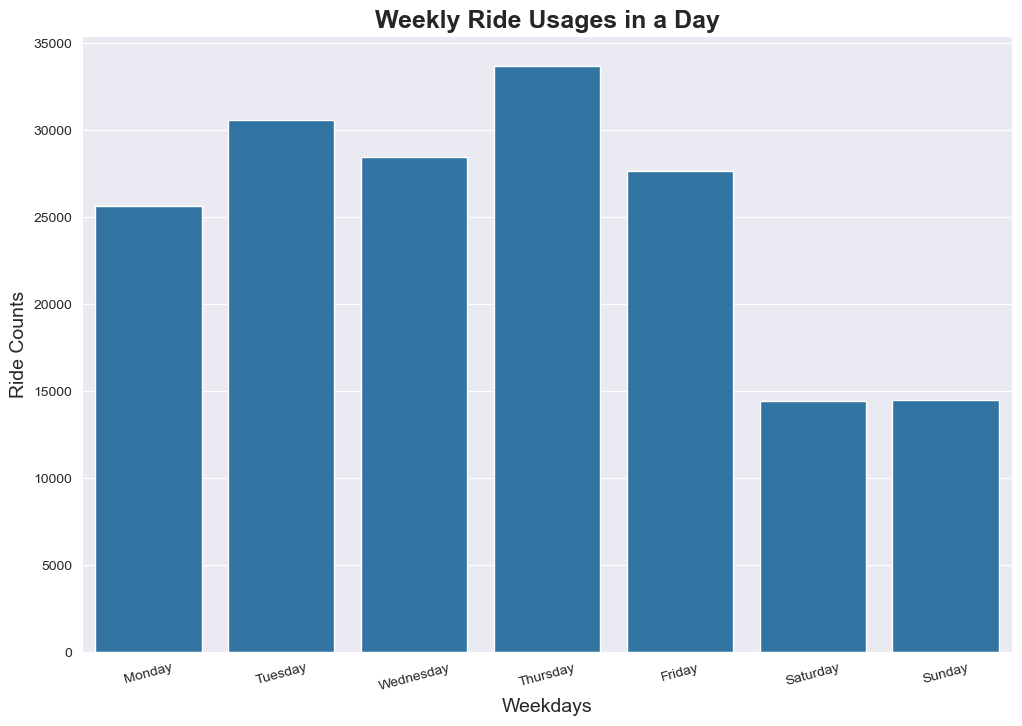

In [43]:
# calculating the weekly rides
weekly_count = gobike_df.groupby(gobike_df.start_time.dt.weekday).duration_min.count()
weekly_count = weekly_count.rename_axis('weekday').reset_index(name='count')
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# drawing the graph
figure_basics("Weekly Ride Usages in a Day")
plot = sns.barplot(data=weekly_count, x='weekday', y='count', color=base_color)
plot.set_xticks(ticks=weekly_count.index, labels=day_names, rotation=15)
plot.set_xlabel("Weekdays", fontsize=14)
plot.set_ylabel("Ride Counts", fontsize=14);

It's surprising that people are not using bike on Weekends as they use in the weekdays.  
  
Thursday is the day most people ride.

#### Bike share users on all trip Distribution


In [44]:
gobike_df.columns

Index(['start_time', 'end_time', 'start_station_name', 'end_station_name',
       'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip',
       'age', 'age_group', 'duration_min'],
      dtype='object')

Let's see the distribution of `bike_share_for_all_trip` distribution.

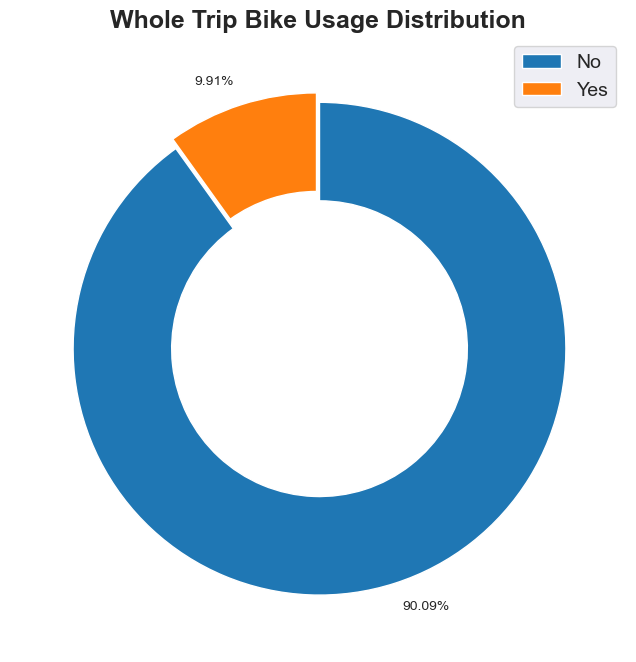

In [45]:
# getting the count of member values
all_trip_count = np.round(gobike_df['bike_share_for_all_trip'].value_counts(normalize=True) * 100, 2)

# Plotting the graph
figure_basics("Whole Trip Bike Usage Distribution")
plt.pie(all_trip_count, labels=[f"{str(x)}%" for x in all_trip_count.values],
        startangle=90, explode=np.repeat(0.02, len(all_trip_count.index)),
        counterclock=False, wedgeprops = {'width' : 0.4});
plt.legend(all_trip_count.index, fontsize=14);

Only 10% of the rides are used as round trips, 90% of the rides are only one way.

#### Start and End station distributions

Since it is hard to plot a graph for 329 (I already new there are 329 stations in the above section) data points, let me plot a histogram distribution of counts for both start and end stations. 

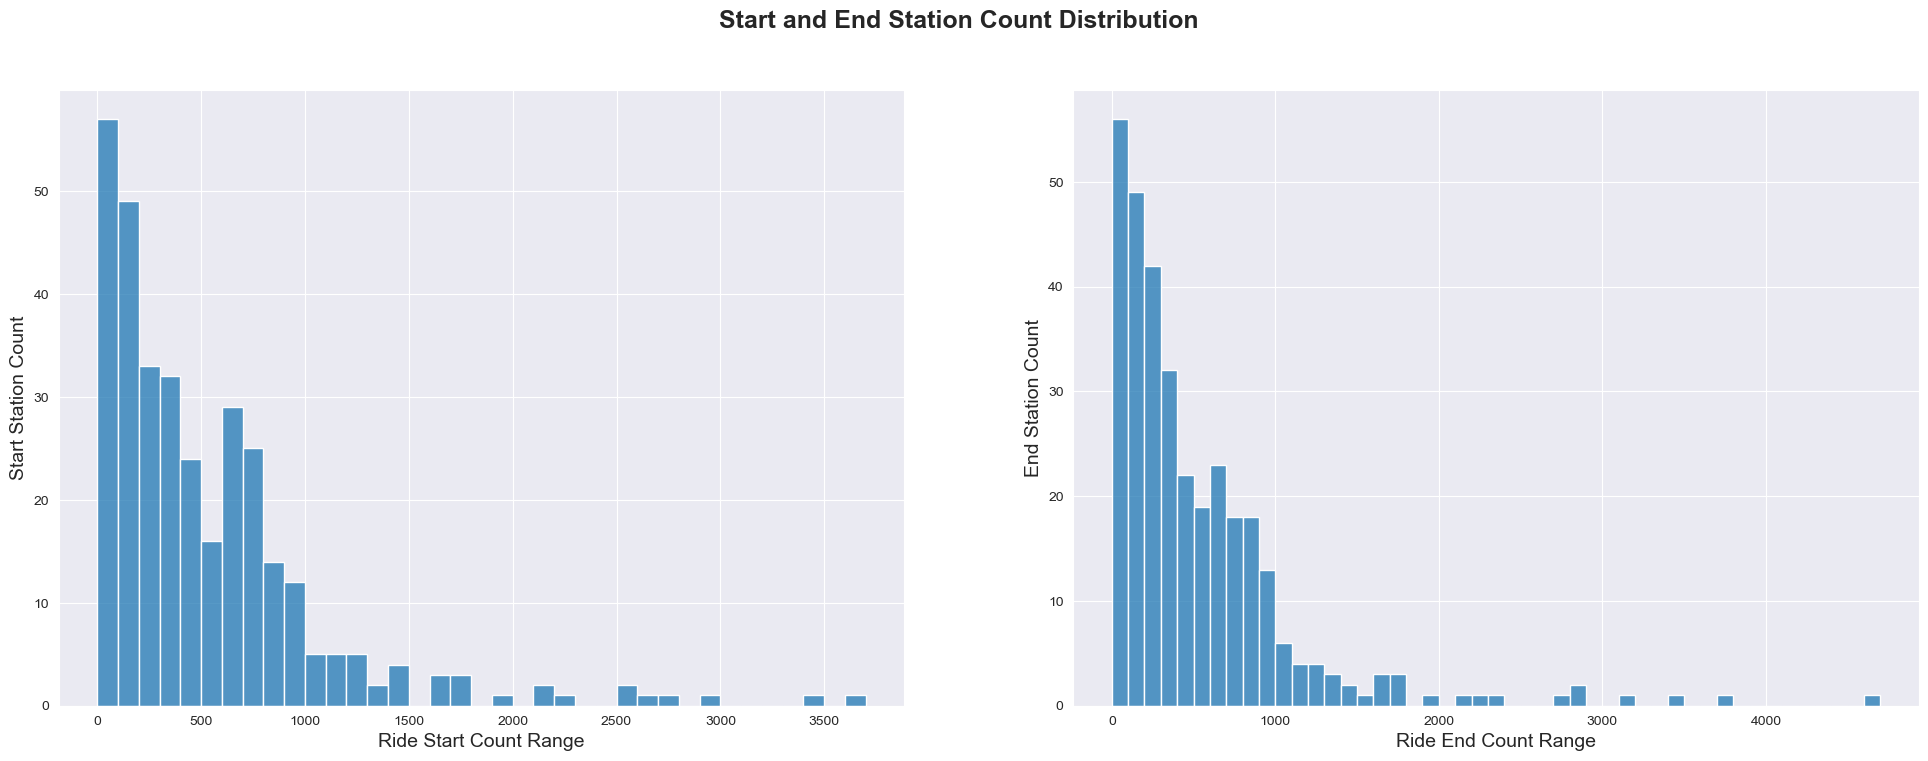

In [46]:
# Getting counts of each start station
ride_start_count = gobike_df.start_station_name.value_counts()
ride_end_count = gobike_df.end_station_name.value_counts()

# plotting the graph
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

plt.suptitle("Start and End Station Count Distribution", fontsize=18, fontweight='bold')

sns.histplot(data=ride_start_count, ax=ax[0], bins=range(0, ride_start_count.max() + 100, 100))
ax[0].set_ylabel("Start Station Count", fontsize=14)
ax[0].set_xlabel("Ride Start Count Range", fontsize=14)

sns.histplot(data=ride_end_count, ax=ax[1], bins=range(0, ride_end_count.max() + 100, 100))
ax[1].set_ylabel("End Station Count", fontsize=14)
ax[1].set_xlabel("Ride End Count Range", fontsize=14);

There are almost 60 stations used less frequently both for start and end stations. There are also some exceptional stations used as start stations with the value of more that 3500 as well as more than 4500 as destination station.  
  
Next let me check what are the most 20 busiest stations for both start and end along with their counts.

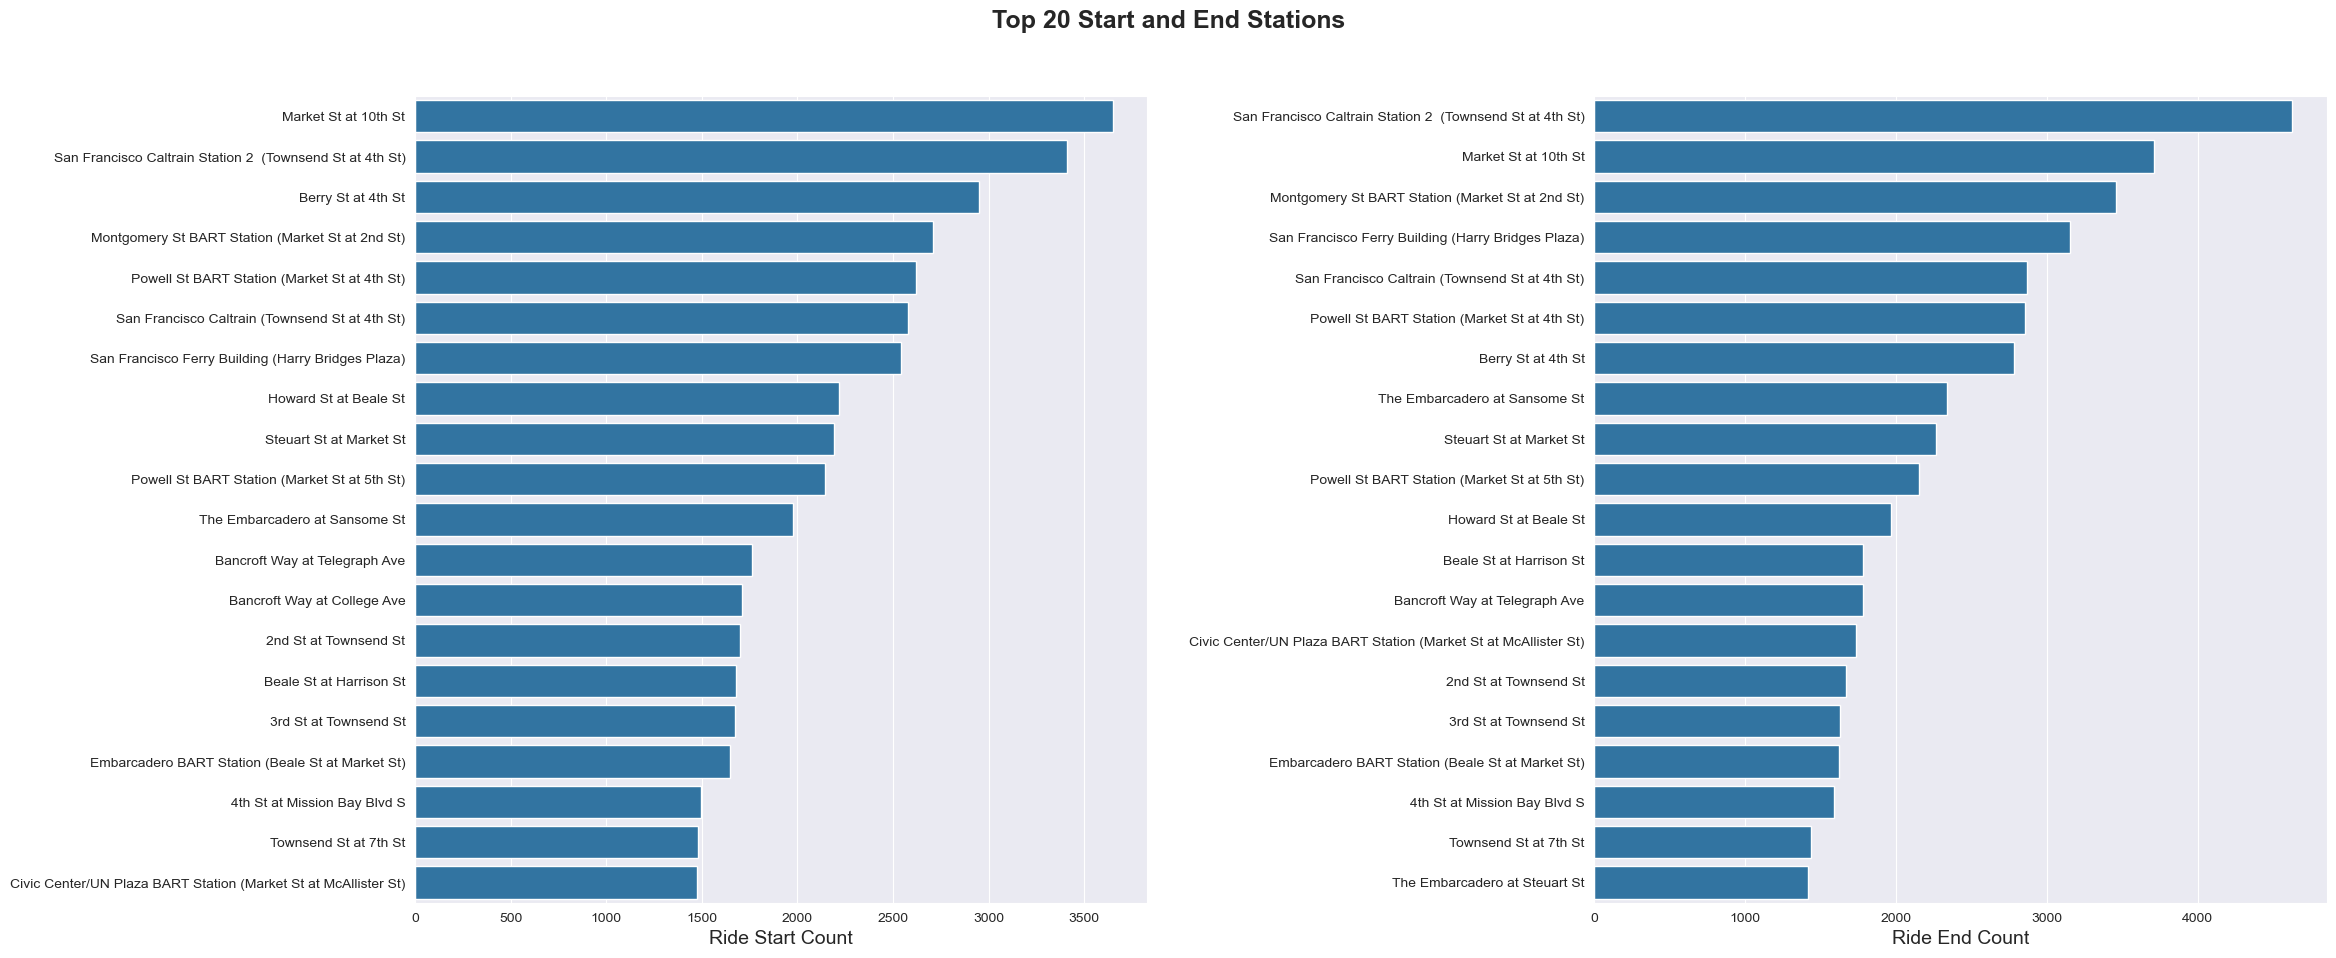

In [47]:
# plotting the graph
fig, ax = plt.subplots(1, 2, figsize=(24, 10))

# Getting the most 20 stations
top_20_start = ride_start_count.head(20)
top_20_end = ride_end_count.head(20)

# resetting the columns
top_20_start = top_20_start.rename_axis("name").reset_index(name="counts")
top_20_end = top_20_end.rename_axis("name").reset_index(name="counts")

plt.suptitle("Top 20 Start and End Stations", fontsize=18, fontweight='bold')

sns.barplot(data=top_20_start, y="name", x="counts", ax=ax[0], color=base_color)
ax[0].set_xlabel("Ride Start Count", fontsize=14)
ax[0].set_ylabel("")

sns.barplot(data=top_20_end, y="name", x="counts", ax=ax[1], color=base_color)
ax[1].set_xlabel("Ride End Count", fontsize=14)
ax[1].set_ylabel("")

fig.tight_layout(pad=3.0);

#### Univariate Exploration Sumary

- The collected data is mostly clean
- Even though it's mostly cleaned data, it has outliers in most of numeric features
- Because it's hard to see the histogram distribution of ride duration in minutes, I used the limit feature of matplotlib to zoom in the values between 0 - 100 since most of the rids last within the range.
  
As mentioned above, most of the features has an outliers; the `age` feature is one of them. To fix that I grouped the ages with in a range of 10 years starting from 10 but I put all of the ages with a value of more than 100 in one group called `100s`

### Bivariate Exploration

In this section, I will investigate relationships between pairs of variables in the dataset while answering the above mentioned questions.

In [48]:
gobike_df.columns

Index(['start_time', 'end_time', 'start_station_name', 'end_station_name',
       'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip',
       'age', 'age_group', 'duration_min'],
      dtype='object')

#### Relationship between Gender and Ride Duration

Even though it is clear that most of the rides duration is not more than 30 mins, let me just check the distribution of Gender to Ride Duration by limiting the duration time under 100.

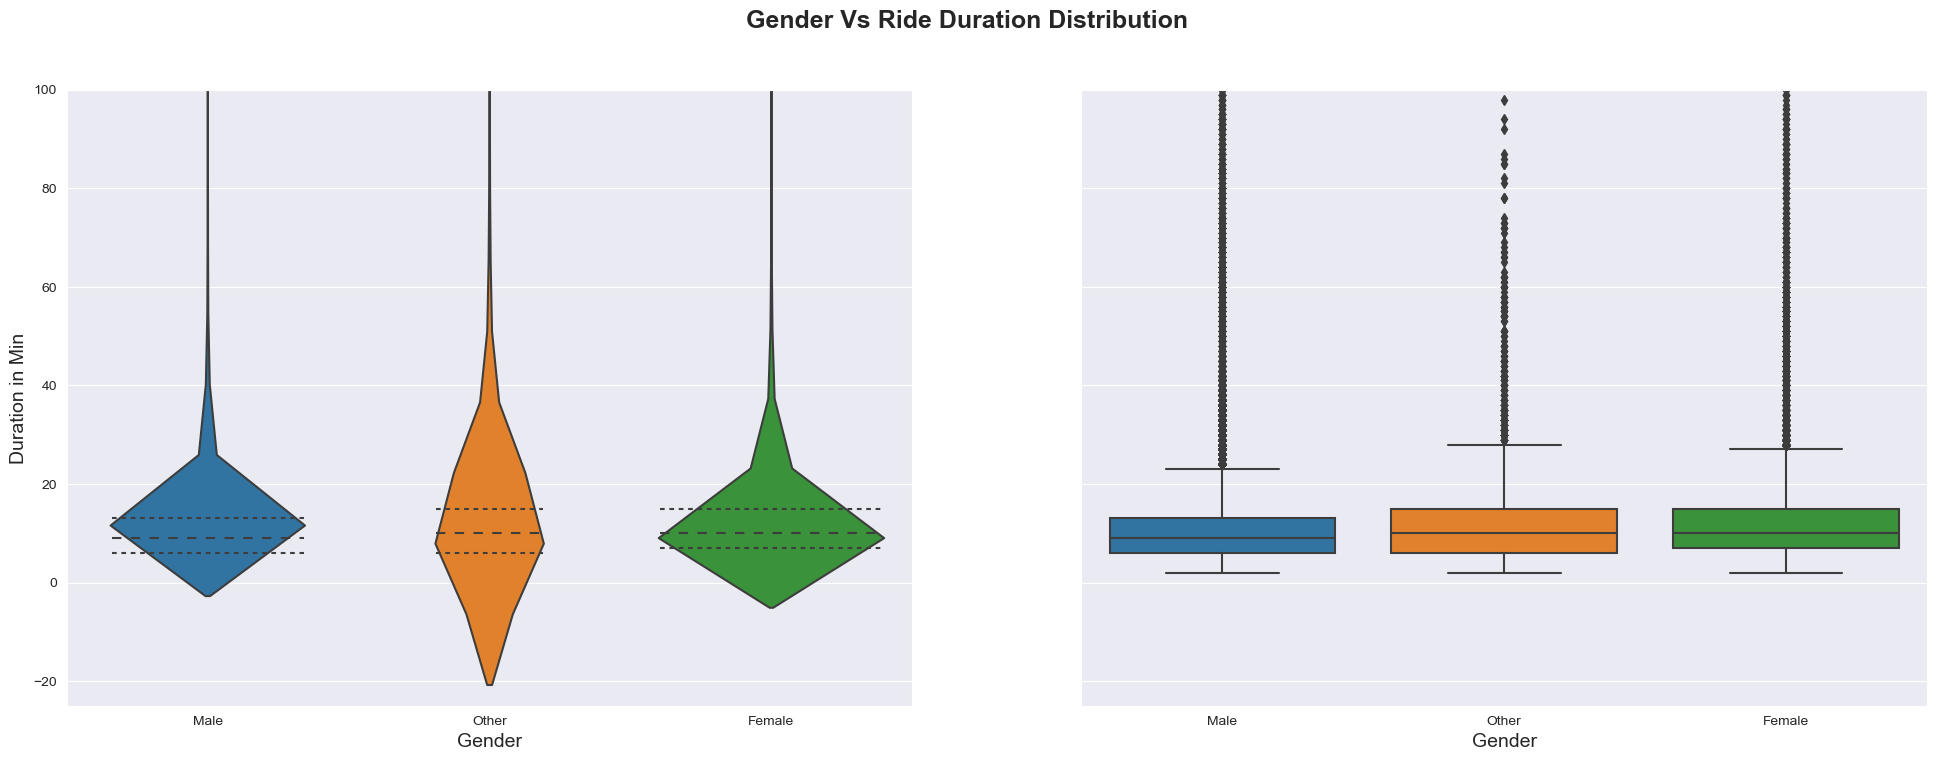

In [49]:
# drawing the graph
fig, ax = plt.subplots(1, 2, figsize=(24, 8), sharey=True)
plt.suptitle("Gender Vs Ride Duration Distribution", fontsize=18, fontweight='bold')

sns.violinplot(data=gobike_df, x='member_gender', y='duration_min', inner="quartile", ax=ax[0])
ax[0].set_ylim((-25, 100))
ax[0].set_xlabel("Gender", fontsize=14)
ax[0].set_ylabel("Duration in Min", fontsize=14)

sns.boxplot(data=gobike_df, x='member_gender', y='duration_min', ax=ax[1])
ax[1].set_xlabel("Gender", fontsize=14)
ax[1].set_ylabel("");

It's not expected that violin plots start from negative values. In the box plot it started from the minimum value.

#### Relationship between Gender and Ride Time in a Day  
What time is the number of riders will be high for each group

Let me visualize the distribution of gender over the hours in a day. Just like what I did in the earlier sections, I will use the ride start time.

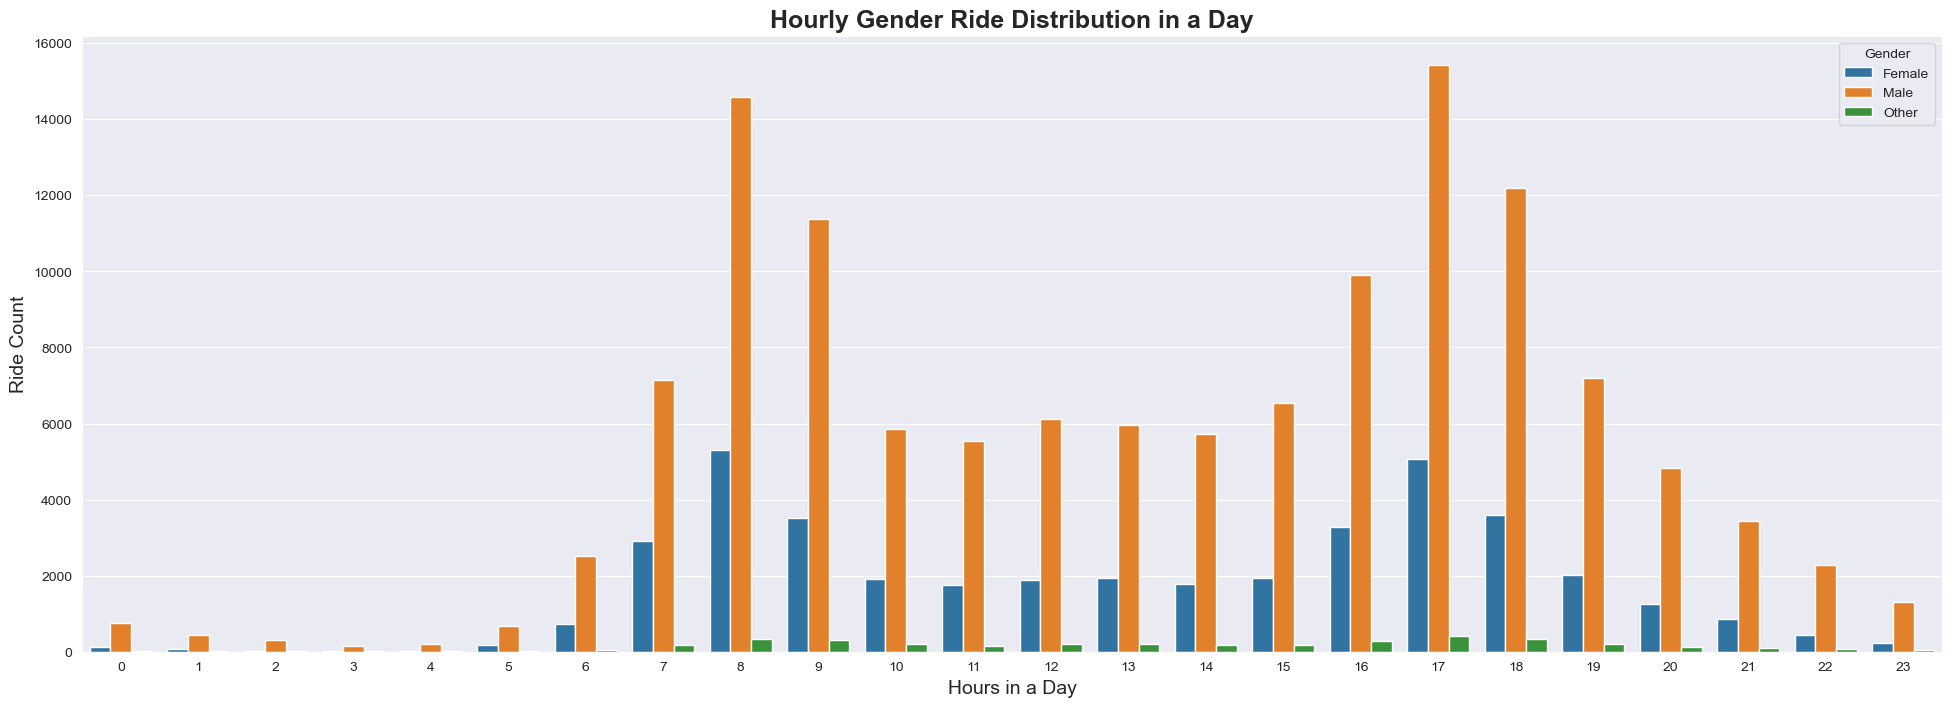

In [50]:
# calculating the hourly rides
hourly_count = gobike_df.groupby([gobike_df.start_time.dt.hour, 'member_gender']).duration_min.count()
hourly_count = hourly_count.reset_index(name='count')

# drawing the graph
figure_basics("Hourly Gender Ride Distribution in a Day", x_double=True)
plot = sns.barplot(data=hourly_count, x='start_time', y='count', hue='member_gender')
plot.set_xlabel("Hours in a Day", fontsize=14)
plot.set_ylabel("Ride Count", fontsize=14)
plt.legend(title="Gender");

Since the number of Females are much lower than the number of Males, it is understandable why the graph looks like above.

#### Relationship between Gender and User Type


Let me create a heatmap to see the relationship between gender, user type, and their counts

Text(122.72222222222221, 0.5, 'Gender')

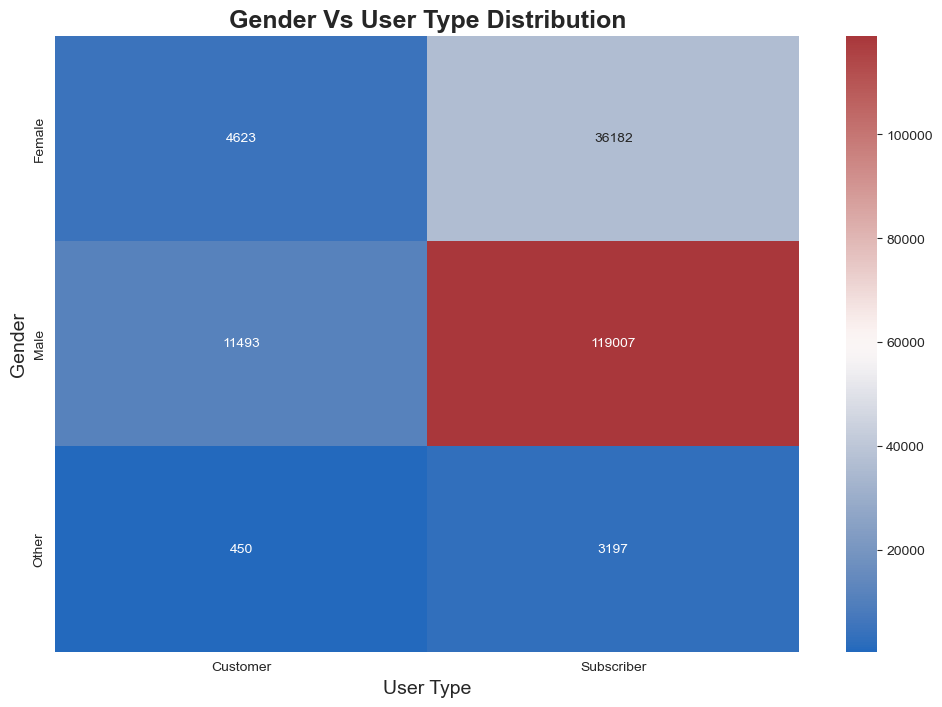

In [51]:
# Creating a pivot table from the dataset
pivoted = gobike_df.pivot_table('duration_min', 'member_gender', 'user_type', aggfunc="count")

# drawing the graph
figure_basics("Gender Vs User Type Distribution")
plot = sns.heatmap(data=pivoted, annot=True, fmt=".0f", cmap='vlag')
plot.set_xlabel("User Type", fontsize=14)
plot.set_ylabel("Gender", fontsize=14)

Again the dominancy of Males is reflected in this section as well, there are a huge number of Male Subscribers.

#### Relationship between Gender and Age


Let me check what the age distribution looks like for the each gender.  
  
I will use both `age` feature and `age_group` feature.

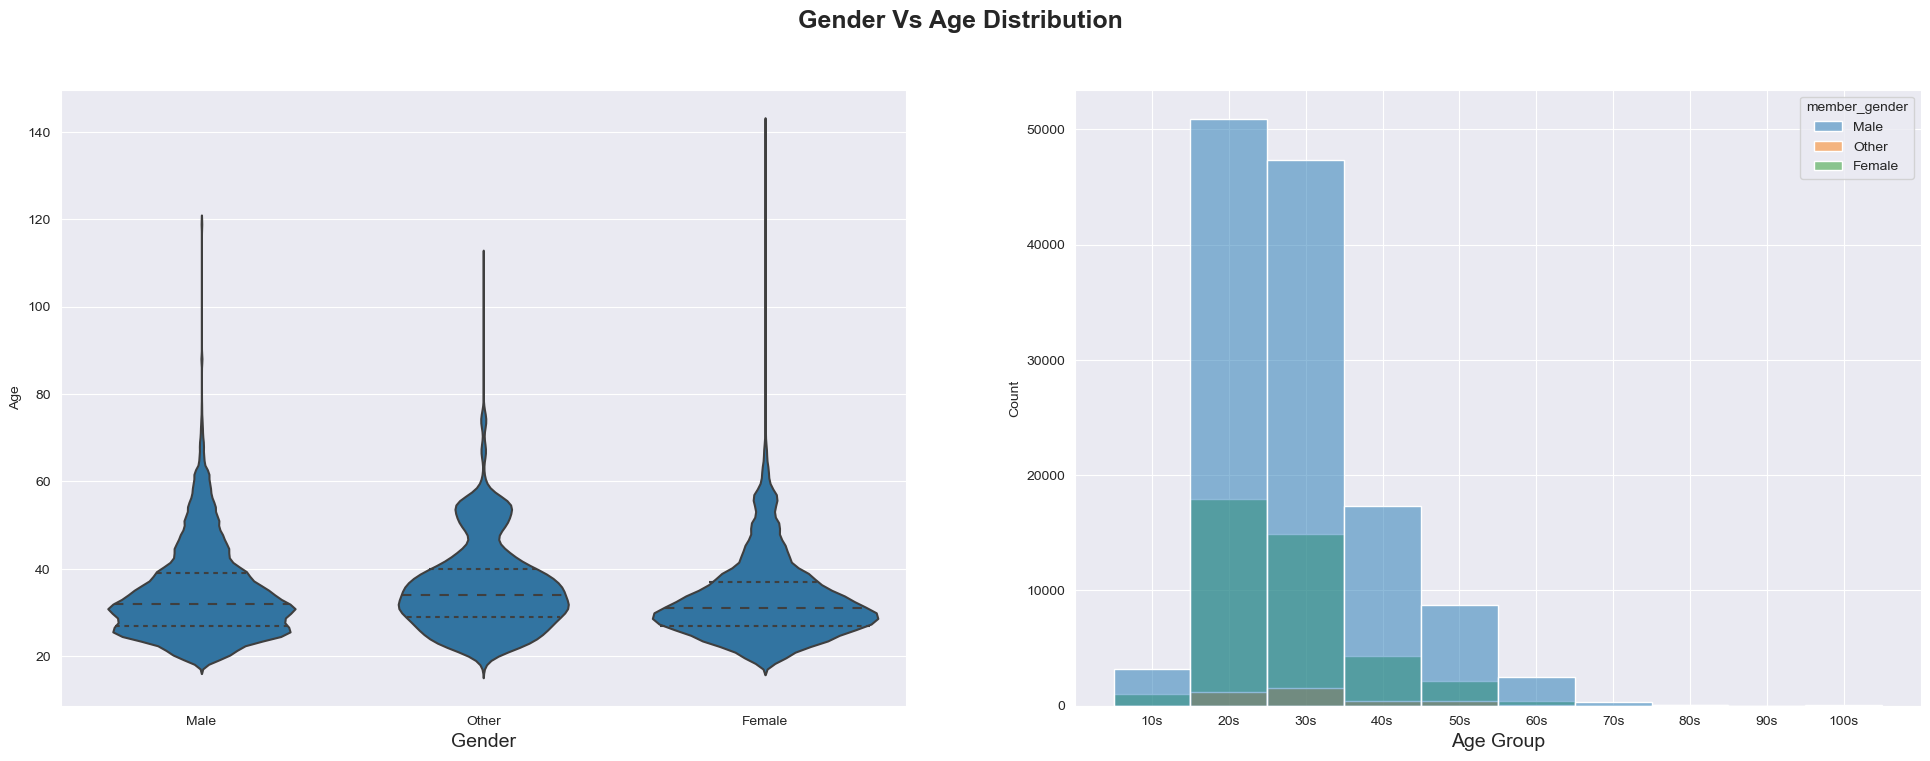

In [52]:
# plotting the graph
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

plt.suptitle("Gender Vs Age Distribution", fontsize=18, fontweight='bold')

sns.violinplot(data=gobike_df, x='member_gender', y='age', color=base_color, inner="quartile", ax=ax[0])
ax[0].set_xlabel("Gender", fontsize=14)
ax[0].set_ylabel("Age")

sns.histplot(data=gobike_df, x='age_group', hue="member_gender", ax=ax[1])
ax[1].set_xlabel("Age Group", fontsize=14)
ax[1].set_ylabel("Count");

For all gender groups the mean value for age is under 40

#### Relationship between User Type and Ride Duration


Although it's know that the ride count of subscribers is much higher than that of customers, I will just check the distribution after limiting the duration below 100 mins.

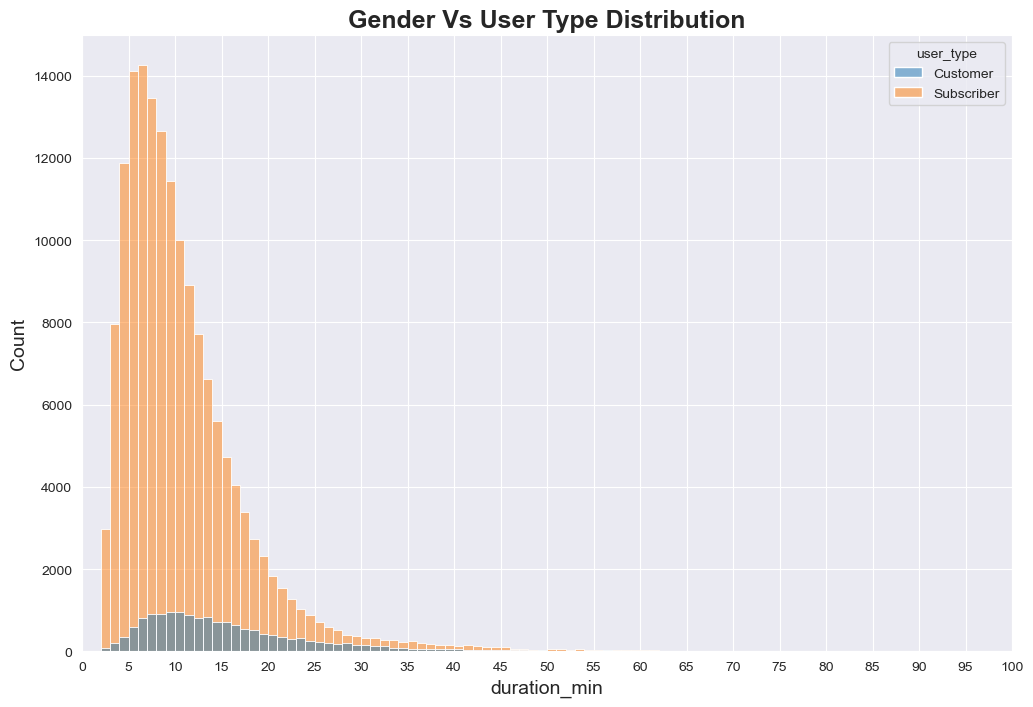

In [53]:
# drawing the graph
figure_basics("Gender Vs User Type Distribution")
sns.histplot(data=gobike_df, x='duration_min', hue="user_type", bins=range(101))
plt.xlim((0, 100))
plt.xticks(ticks=range(0, 105, 5));

The result is as expected, the customers duration is much lower than the subscribers.

#### Relationship between User Type and Ride Time Hourly

The hourly distribution of user type ride count hourly in a day.

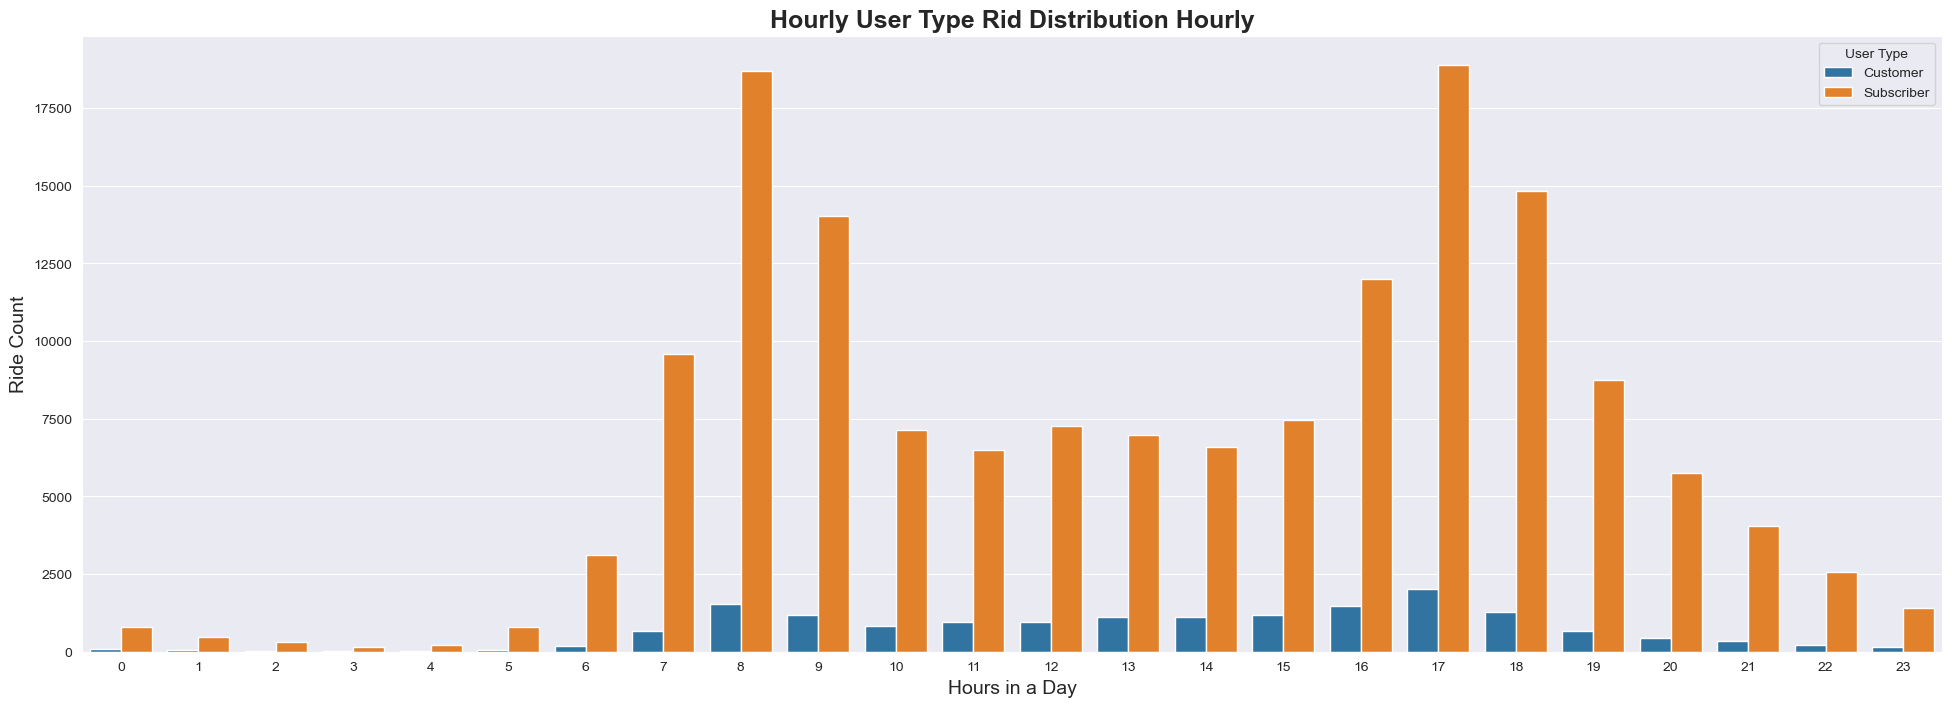

In [54]:
# calculating the hourly rides
hourly_count = gobike_df.groupby([gobike_df.start_time.dt.hour, 'user_type']).duration_min.count()
hourly_count = hourly_count.reset_index(name='count')

# drawing the graph
figure_basics("Hourly User Type Rid Distribution Hourly", x_double=True)
plot = sns.barplot(data=hourly_count, x='start_time', y='count', hue='user_type')
plot.set_xlabel("Hours in a Day", fontsize=14)
plot.set_ylabel("Ride Count", fontsize=14)
plt.legend(title="User Type");

There are subscribed users who ride bike during 1 - 5 AM, it's rare for the customers.

#### Relationship between User Type and Age


I am just going to use the exact same method I used to visualize the Gender-Age Distribution.

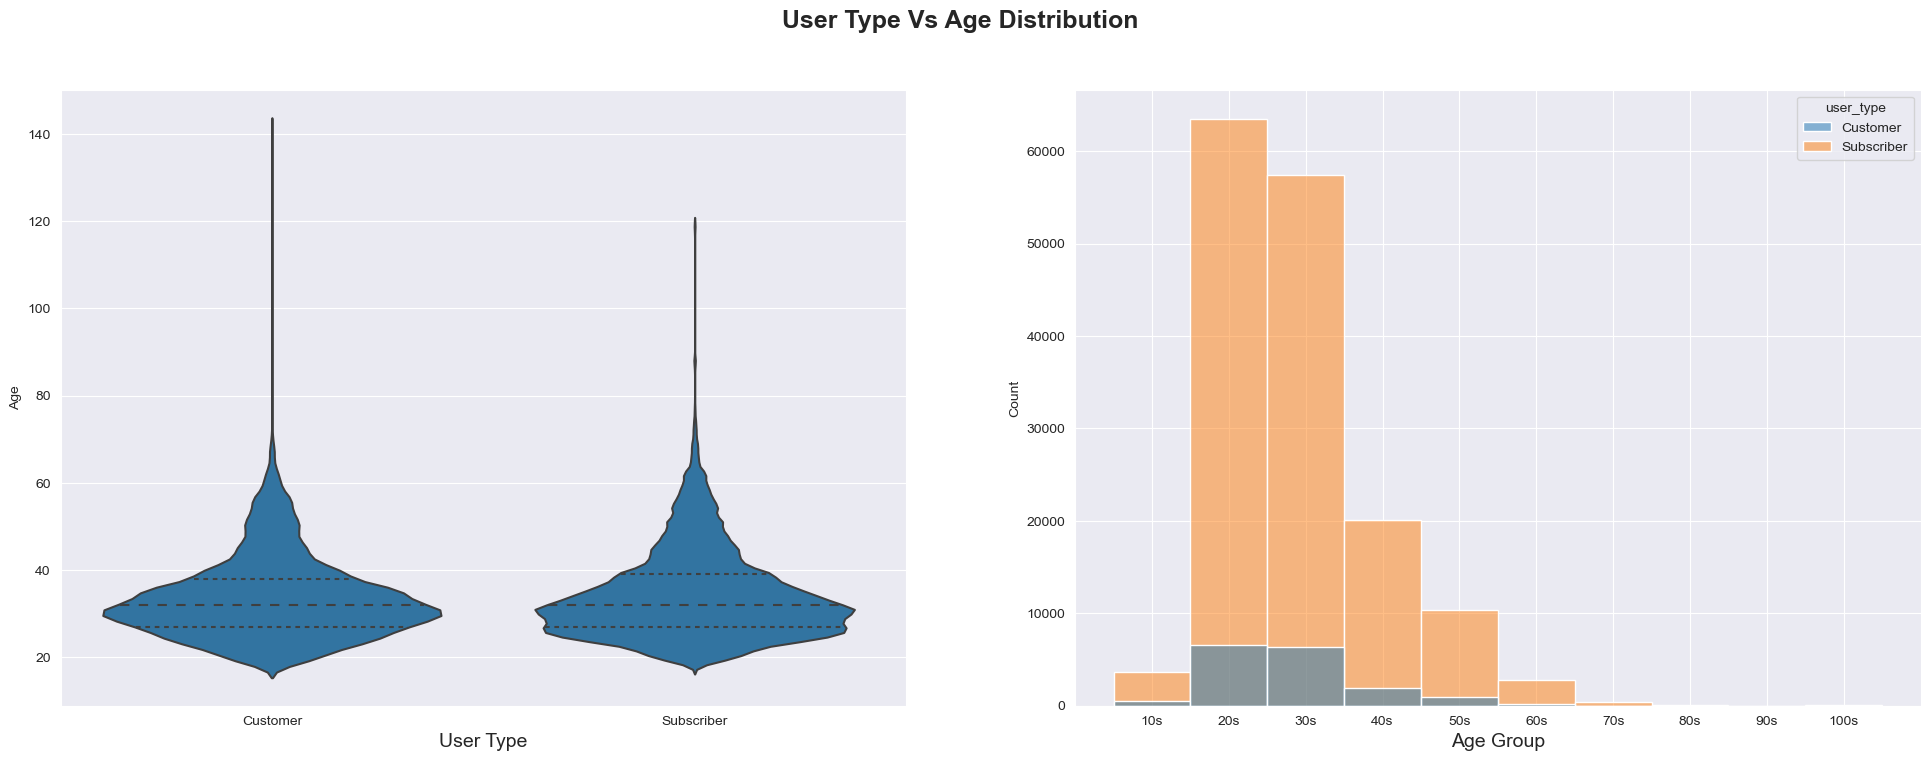

In [55]:
# plotting the graph
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

plt.suptitle("User Type Vs Age Distribution", fontsize=18, fontweight='bold')

sns.violinplot(data=gobike_df, x='user_type', y='age', color=base_color, inner="quartile", ax=ax[0])
ax[0].set_xlabel("User Type", fontsize=14)
ax[0].set_ylabel("Age")

sns.histplot(data=gobike_df, x='age_group', hue="user_type", ax=ax[1])
ax[1].set_xlabel("Age Group", fontsize=14)
ax[1].set_ylabel("Count");

It's a confirmation that the mean age for all user type is under 40.

#### Relationship between Ride Time Hourly and Duration

Let me check the relationship between the duration in a min with the hourly time in a day.

Text(0, 0.5, 'Hours')

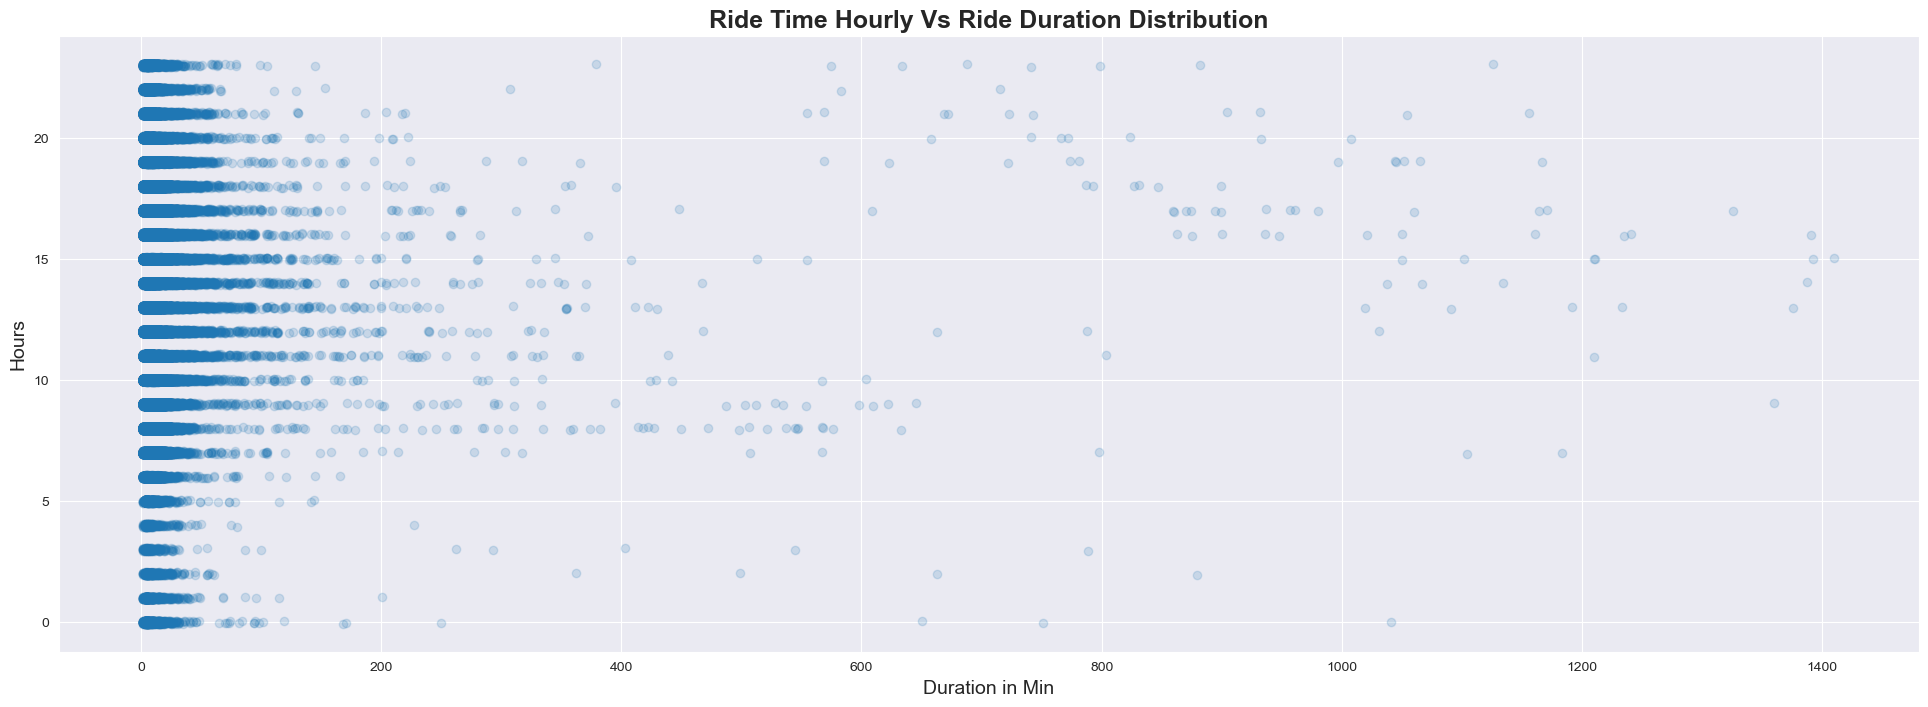

In [56]:
figure_basics("Ride Time Hourly Vs Ride Duration Distribution", x_double=True)
plot = sns.regplot(x=gobike_df.duration_min, y=gobike_df.start_time.dt.hour, y_jitter=0.06, scatter_kws={'alpha':1/6}, fit_reg=False)
plot.set_xlabel("Duration in Min", fontsize=14)
plot.set_ylabel("Hours", fontsize=14)

I wasn't expecting that Most of the duration outliers could fall in a hours between 10 AM and 11 PM. They are more congested between 3 PM and 8 PM.

#### Relationship between Age and Ride Duration

Let me use a heatmap to visualize the relationship between `age` and ride duration in min

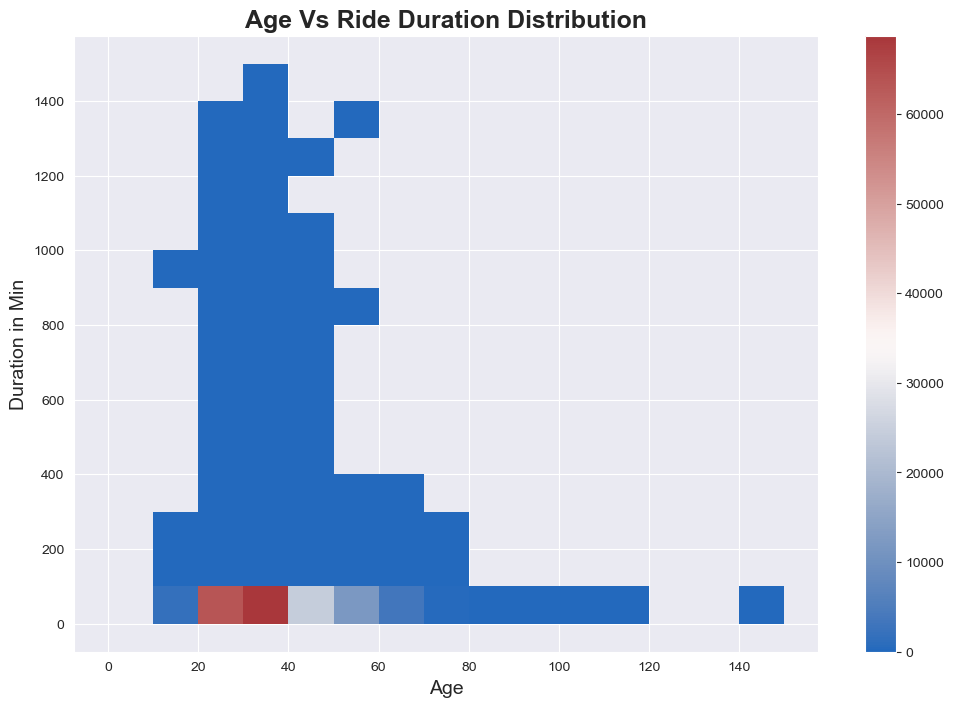

In [57]:
# preparing the bins
bin_x = range(0, gobike_df.age.max() + 10, 10)
bin_y = range(0, gobike_df.duration_min.max() + 100, 100)

figure_basics("Age Vs Ride Duration Distribution")
plot = sns.histplot(data=gobike_df, x='age', y='duration_min', bins=[bin_x, bin_y], cbar=True, cmap='vlag')
plot.set_xlabel("Age", fontsize=14)
plot.set_ylabel("Duration in Min", fontsize=14);

As it is obvious only the values between 20 - 60 are darken for age value for the respective range value of 0 - 100 for ride duration in minutes.

#### Bivariate Exploration Summary

- The number of subscriber usage and ride durations are lot more than customers
- It is surprising that most of the long duration rides fall in to the range of 3 PM and 8 PM.
- The duration of the trip is inversely related to the age. The younger the user, the longer the trip.
  
It's interesting how violin plots are different from box plot when plotting the same data. Violin plots start from negative values whereas box plot started from the actual minimum value when plotting Gender Vs Ride Duration graph.

### Multivariate Exploration

#### Correlation between Gender, Age, and User Type Distribution

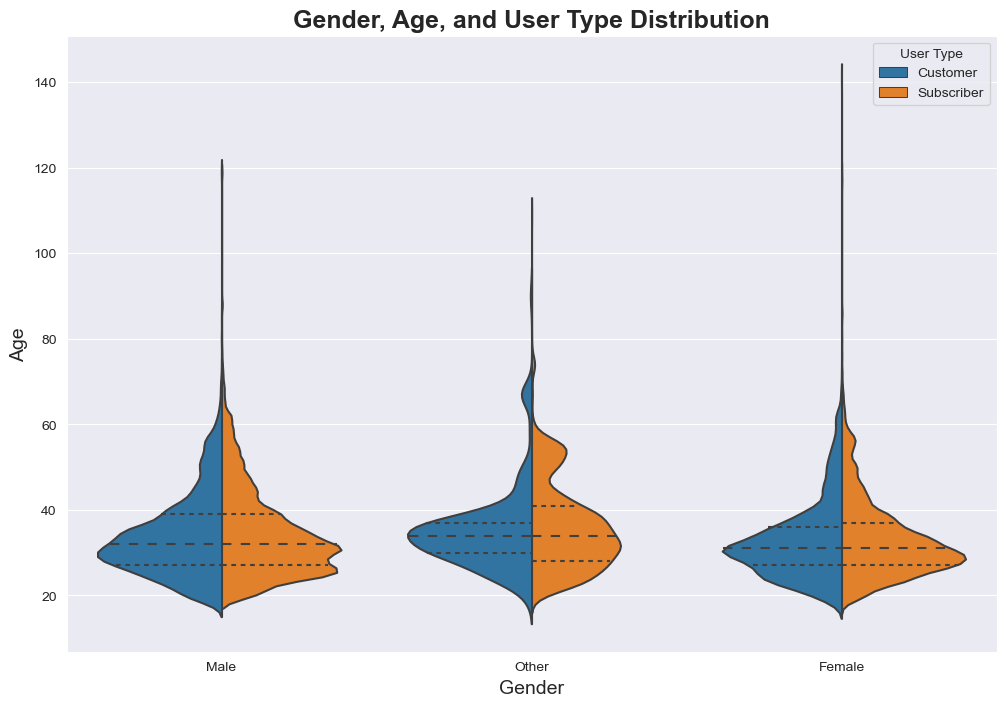

In [58]:
figure_basics("Gender, Age, and User Type Distribution")
plot = sns.violinplot(data=gobike_df, x='member_gender', y='age', hue="user_type", split=True,  inner="quartile")
plot.set_xlabel("Gender", fontsize=14)
plot.set_ylabel("Age", fontsize=14)
plt.legend(title="User Type");

The first and third inter quartile for Other Subscribers Gender is different, although the mean stays the same. The other gender types have the same inter quartile values.

#### Correlation between User Type, Gender, and Hour in a Day

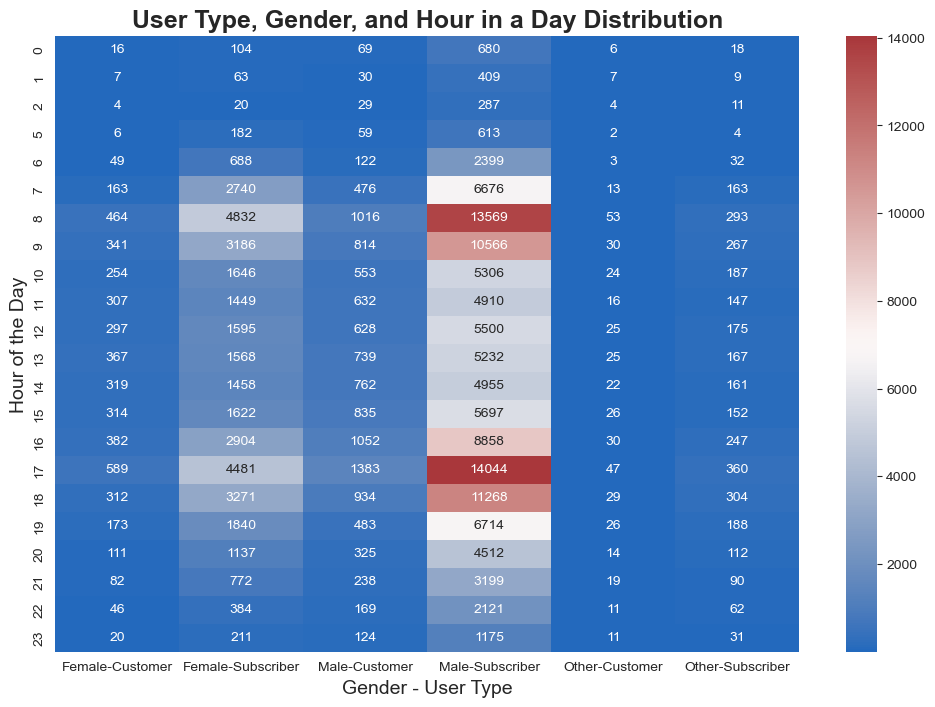

In [59]:
# Grouping the data using, hour, gender, and user type
grouped = gobike_df.groupby([gobike_df.start_time.dt.hour, 'member_gender', 'user_type']).size().reset_index(name='count')
# fixing the layout of the dataset
grouped = grouped.pivot(index='start_time', columns=['member_gender', 'user_type'], values = 'count').dropna()

# plotting the graph
figure_basics("User Type, Gender, and Hour in a Day Distribution")
plot = sns.heatmap(grouped, annot=True, fmt='.0f', cmap='vlag')
plot.set_xlabel("Gender - User Type", fontsize=14)
plot.set_ylabel("Hour of the Day", fontsize=14);

This graph is an approval that the usage hours for all gender types gets higher during the rush hours as it discovered in the previous section.

##### Correlation between User Type, Gender, and Day in a Week


The same approach as above.

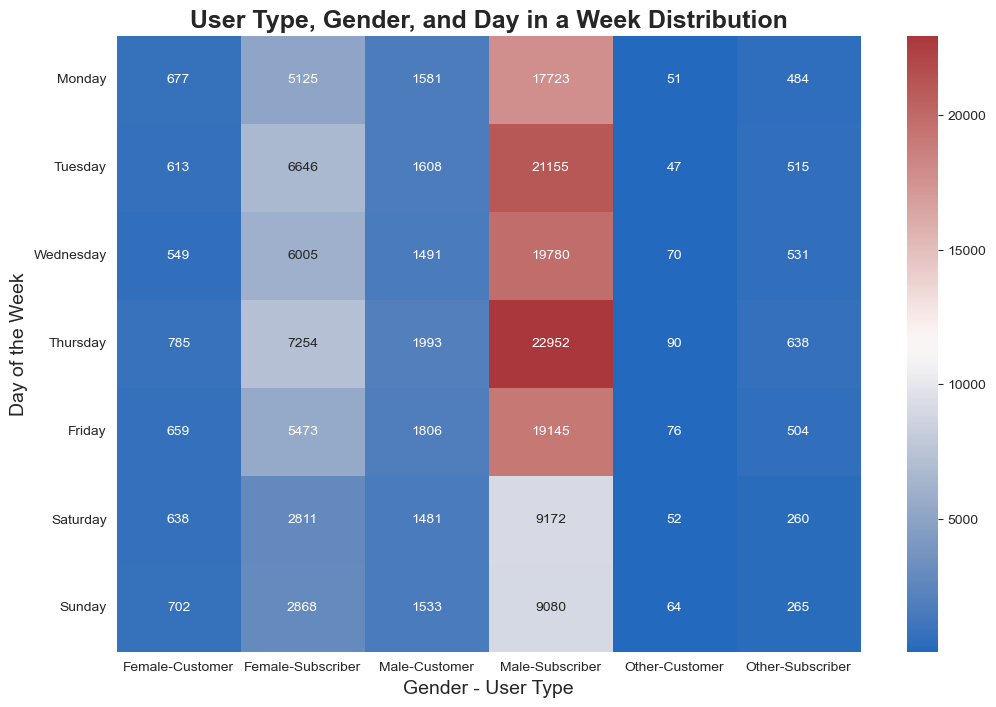

In [60]:
grouped = gobike_df.groupby([gobike_df.start_time.dt.day_of_week, 'member_gender', 'user_type']).size().reset_index(name='count')
grouped = grouped.pivot(index='start_time', columns=['member_gender', 'user_type'], values = 'count').dropna()

figure_basics("User Type, Gender, and Day in a Week Distribution")
plot = sns.heatmap(grouped, annot=True, fmt='.0f', cmap='vlag')
plot.set_xlabel("Gender - User Type", fontsize=14)
plot.set_ylabel("Day of the Week", fontsize=14)
plot.set_yticks(ticks=grouped.index + 0.5, labels=day_names, rotation=0);

As it is already discovered in the previous sections, the number of usages tends to be higher on Tuesdays and Thursdays, and still males have the highest number of usage in those two days

#### Correlation between User Type, Day in a Week, and Hour in a Day

Now let me bring all together and create a heatmap for each User Type to find out usage frequency distributed over the weekdays and hours in a day.  
  
First thing first, let me create a feature called `weekday` to make the process easier.

In [61]:
# adding one additional column
gobike_df["weekday"] = gobike_df.start_time.dt.weekday

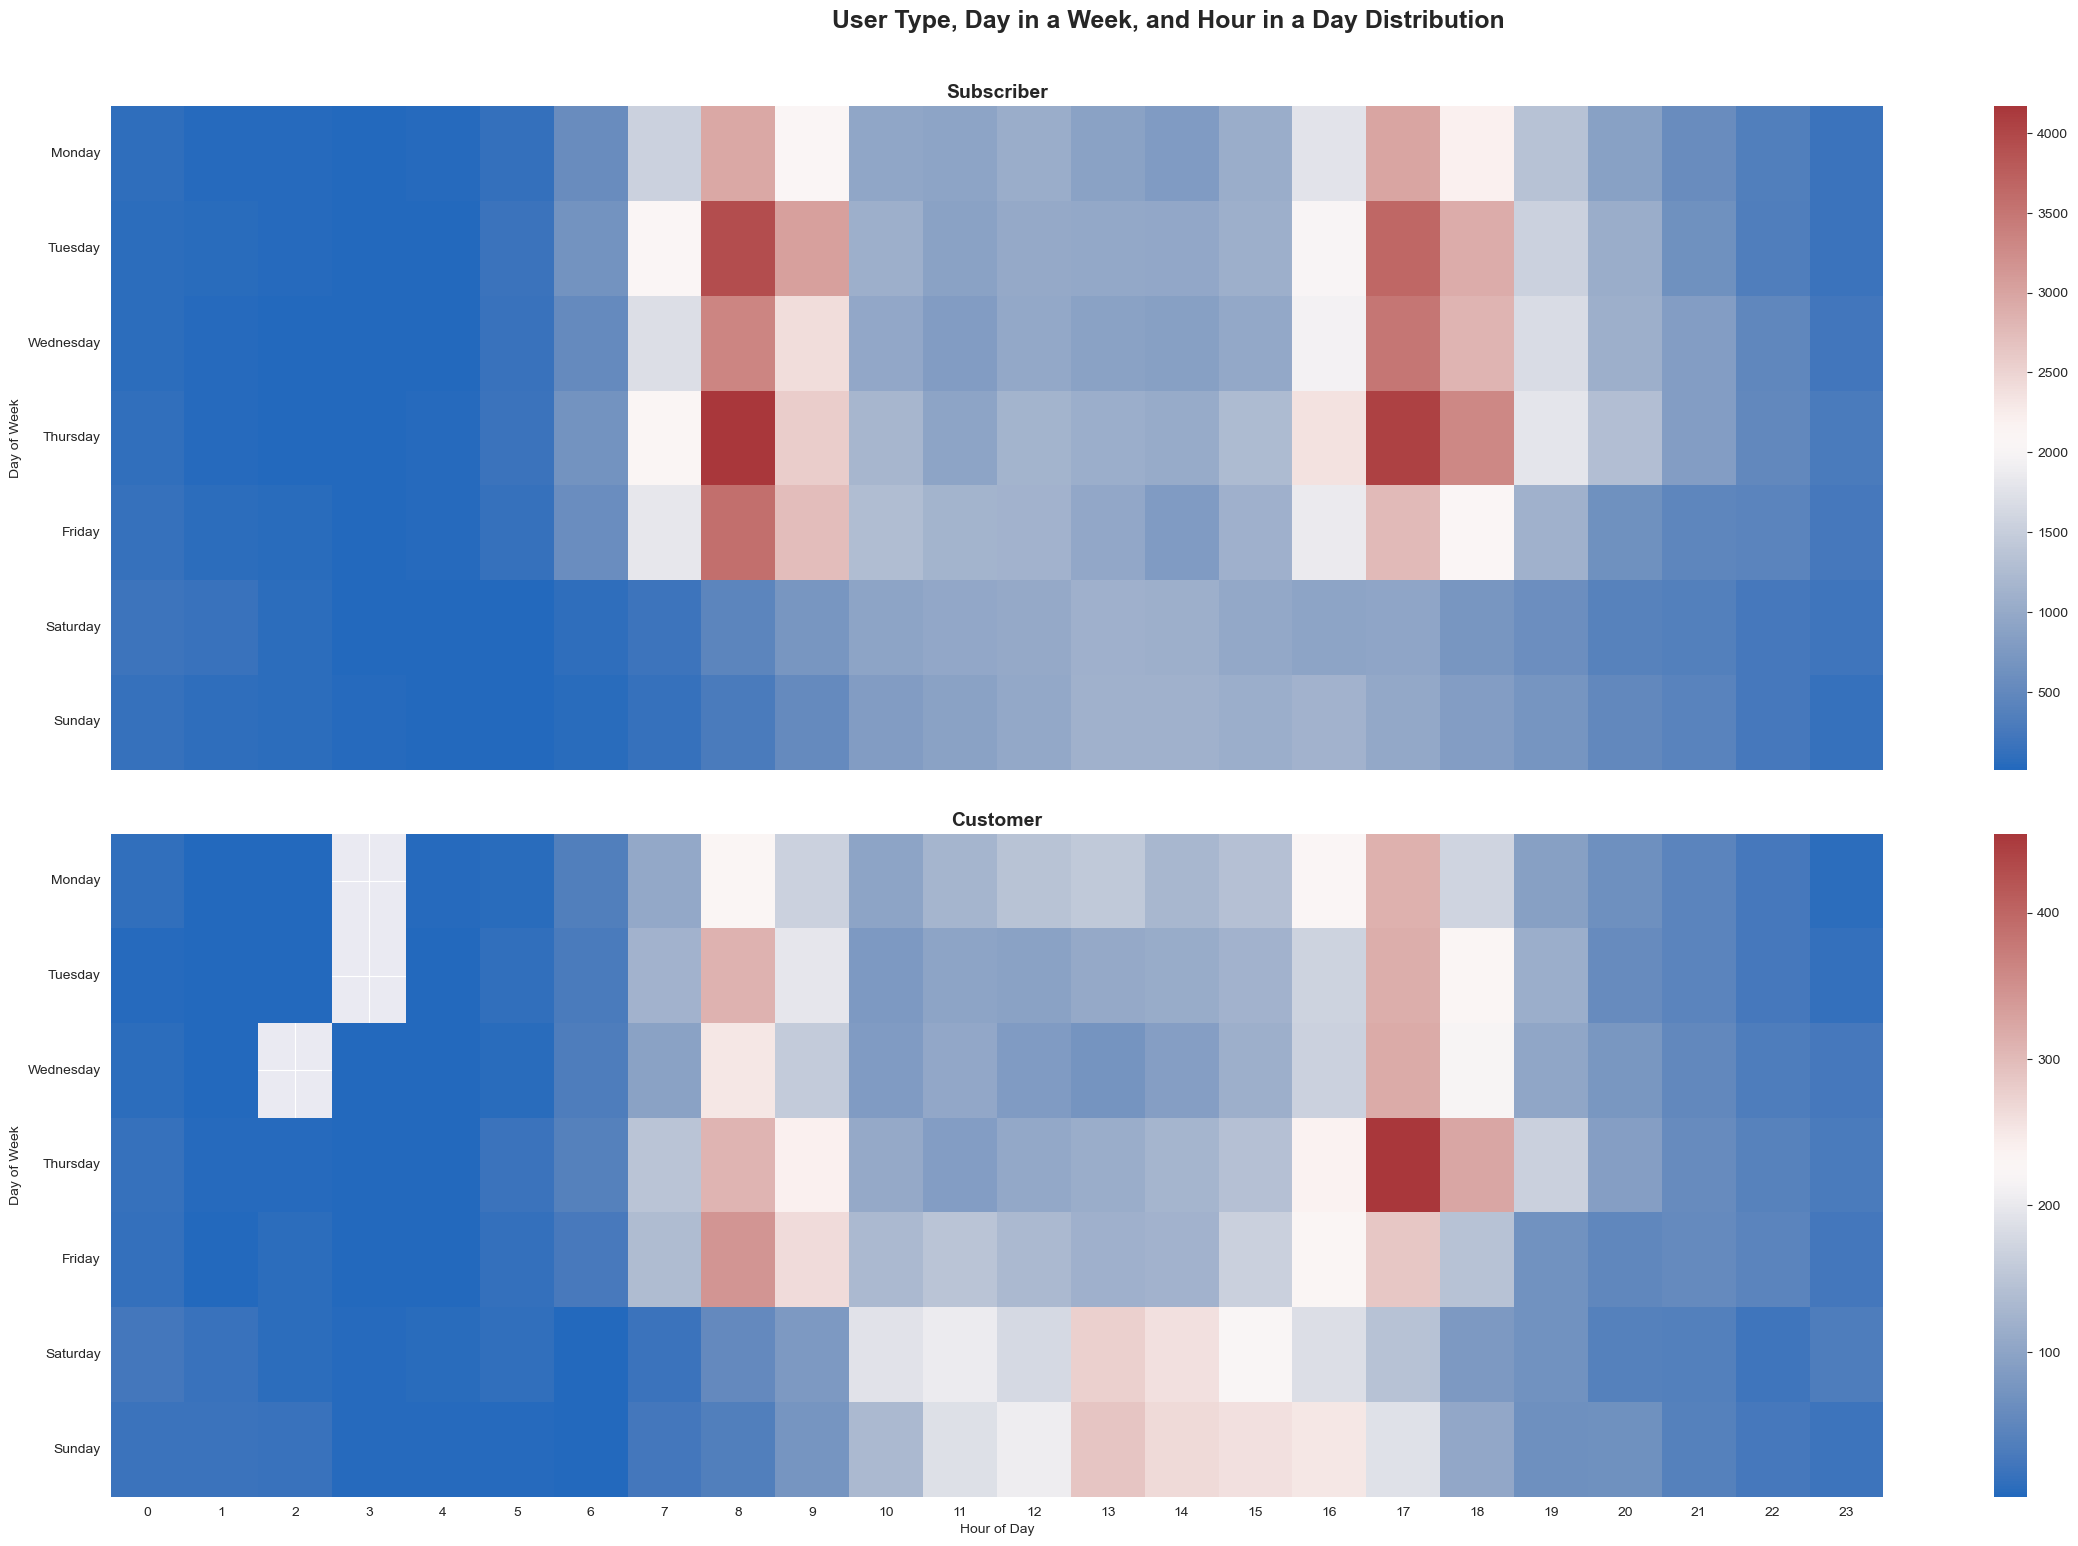

In [62]:
# plotting the graph
fig, ax = plt.subplots(2, 1, figsize=(24, 16), sharex=True)

plt.suptitle("User Type, Day in a Week, and Hour in a Day Distribution", fontsize=18, fontweight='bold')

# Subscribers graph
subscribers = gobike_df[gobike_df.user_type == 'Subscriber']
subscribers_count = subscribers.groupby([gobike_df.weekday, gobike_df.start_time.dt.hour]).size().reset_index(name='count')
subscribers_count = subscribers_count.pivot(index='weekday', columns='start_time', values='count')

sns.heatmap(subscribers_count, cmap='vlag', ax=ax[0])
ax[0].set_title('Subscriber', loc='center', fontsize=14, fontweight='bold')
ax[0].set_xlabel('')
ax[0].set_ylabel('Day of Week')
ax[0].set_yticks(ticks=grouped.index + 0.5, labels=day_names, rotation=0)

# Customers graph
customers = gobike_df[gobike_df.user_type == 'Customer']
customers_count = customers.groupby([gobike_df.weekday, gobike_df.start_time.dt.hour]).size().reset_index(name='count')
customers_count = customers_count.pivot(index='weekday', columns='start_time', values='count')

sns.heatmap(customers_count, cmap='vlag', ax=ax[1])
plt.title('Customer', loc='center', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
ax[1].set_yticks(ticks=grouped.index + 0.5, labels=day_names, rotation=0)

fig.tight_layout(pad=3.0);

This graph puts all thing together and clearly delivers which user type is riding at what time during the day.  
  
For both subscribers and customers the usage is almost similar between 7 AM and 8 PM but unlike subscribers customers tend to ride more between 2 AM and 3 AM from Monday till Wednesday.

#### Multivariate Exploration Summary

- More of the results has been found in the previous sections but this section has been a confirmation of what I did in the previous sections.
- Finding out that Customers use more between 2 AM and 3 AM from Monday till Wednesday was interesting.

## Conclusions

In this notebook I used all three types of exploration; univariate, bivariate, and multivariate. Following them as their order helps me became more confident in the findings I discovered in the previous stage.